In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas  as pd

from pyproj import CRS
from pyproj import Proj
from pyproj import Transformer
import geopandas

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import requests; from urllib.parse import urlparse
import json

import urllib
from matplotlib import font_manager

from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')

C:\ANACONDA3-1\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

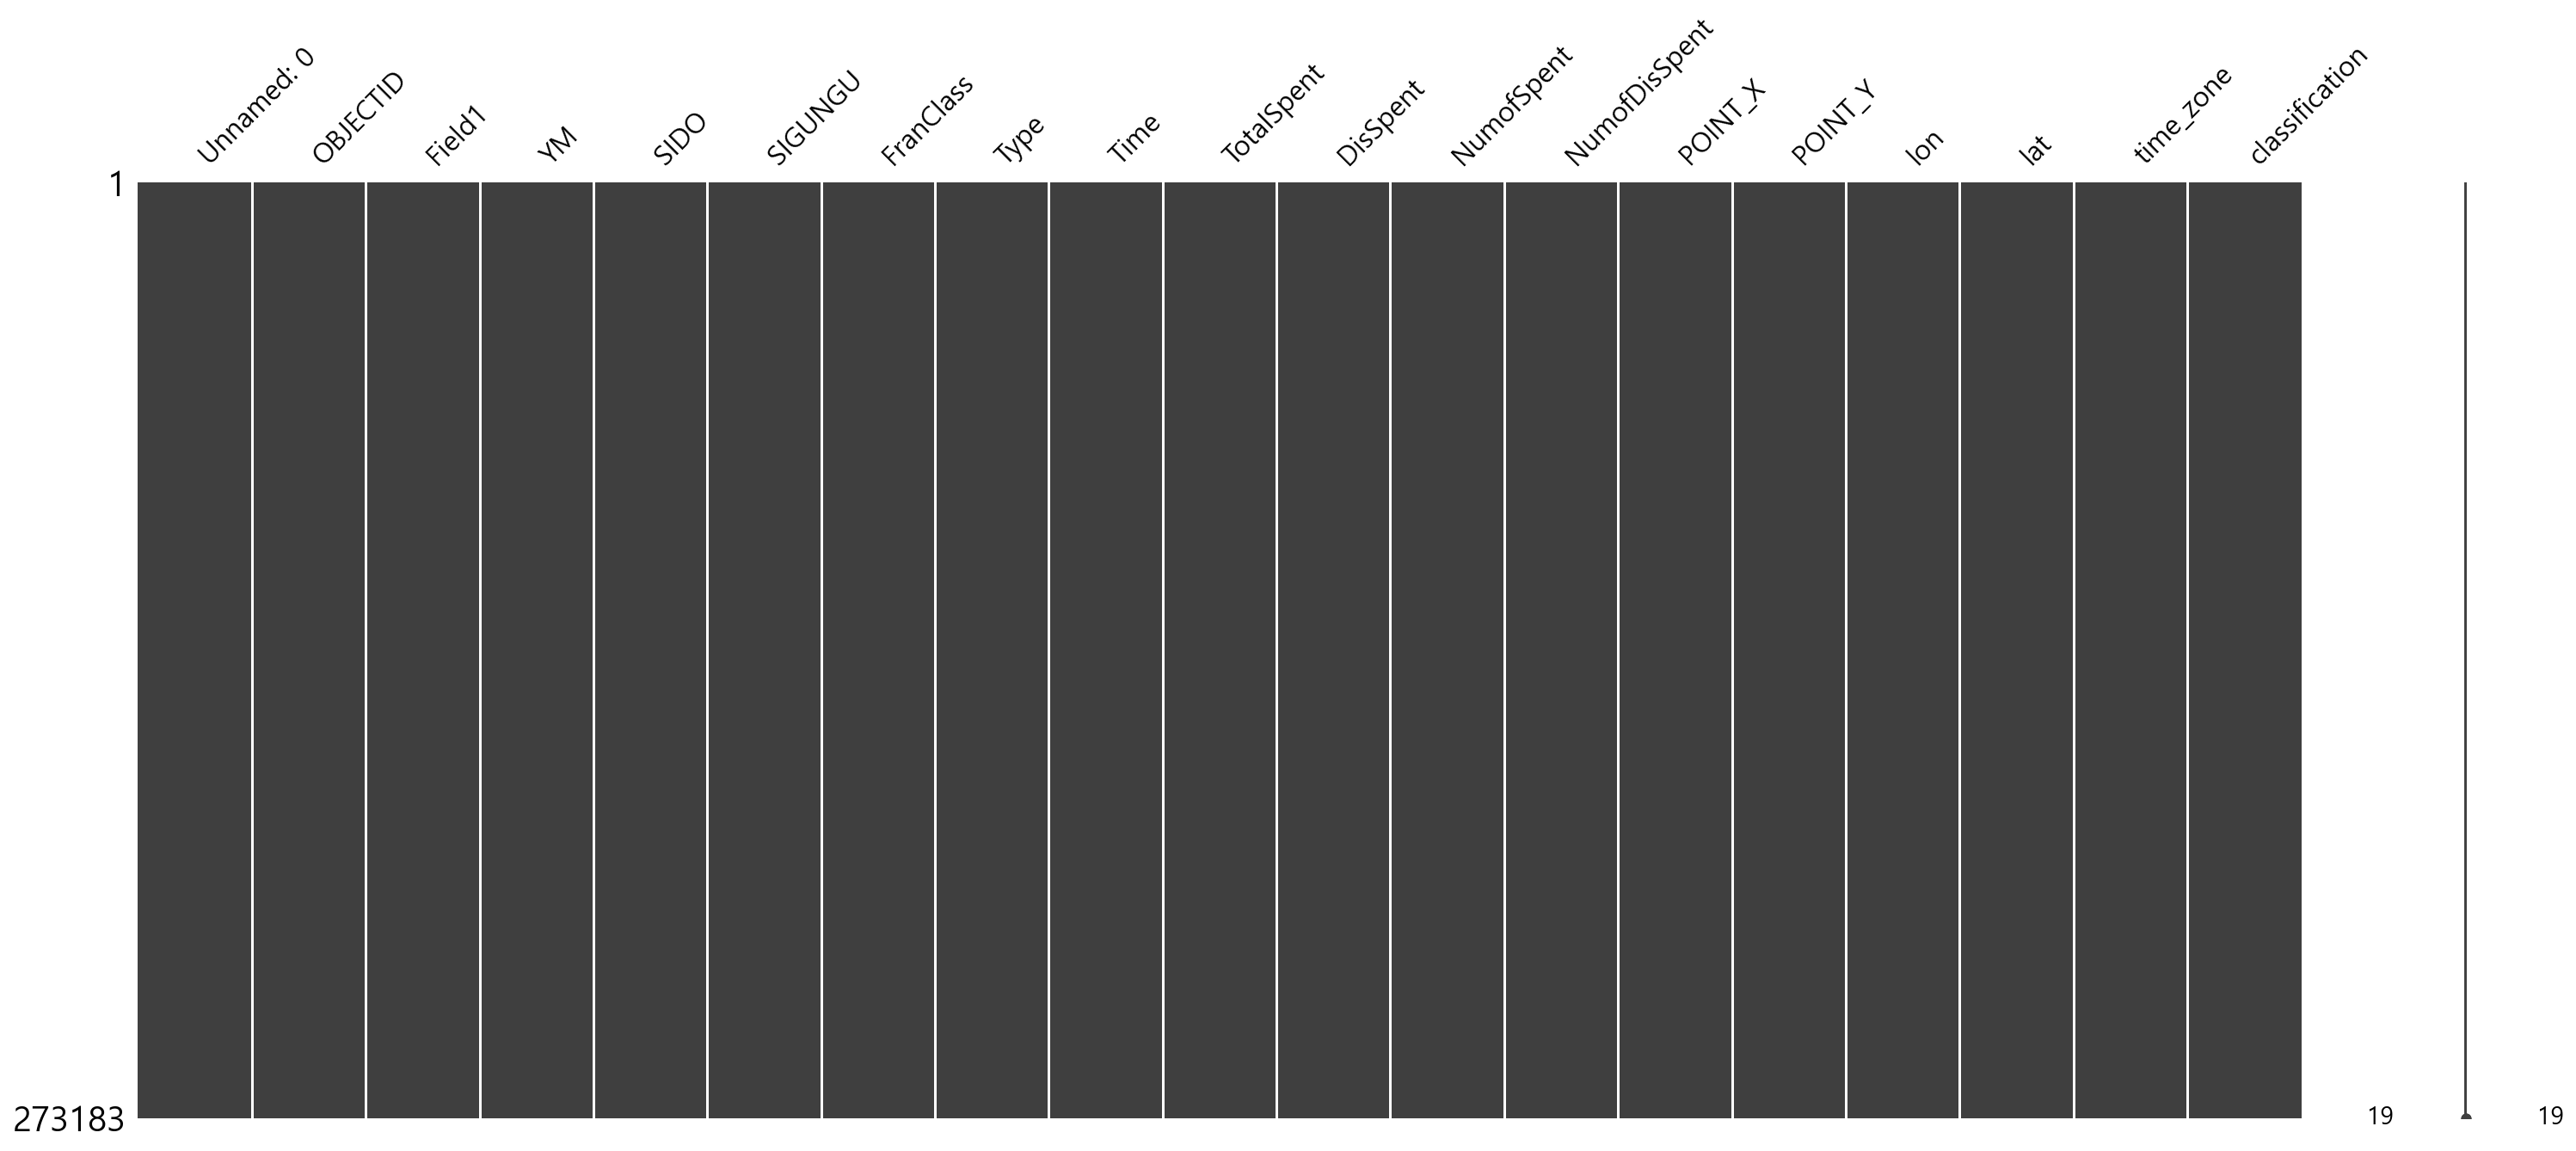

In [678]:
df_5 = pd.read_csv('./data/df_5.csv', sep=',',encoding='euc-kr')
msno.matrix(df_5)

<AxesSubplot:>

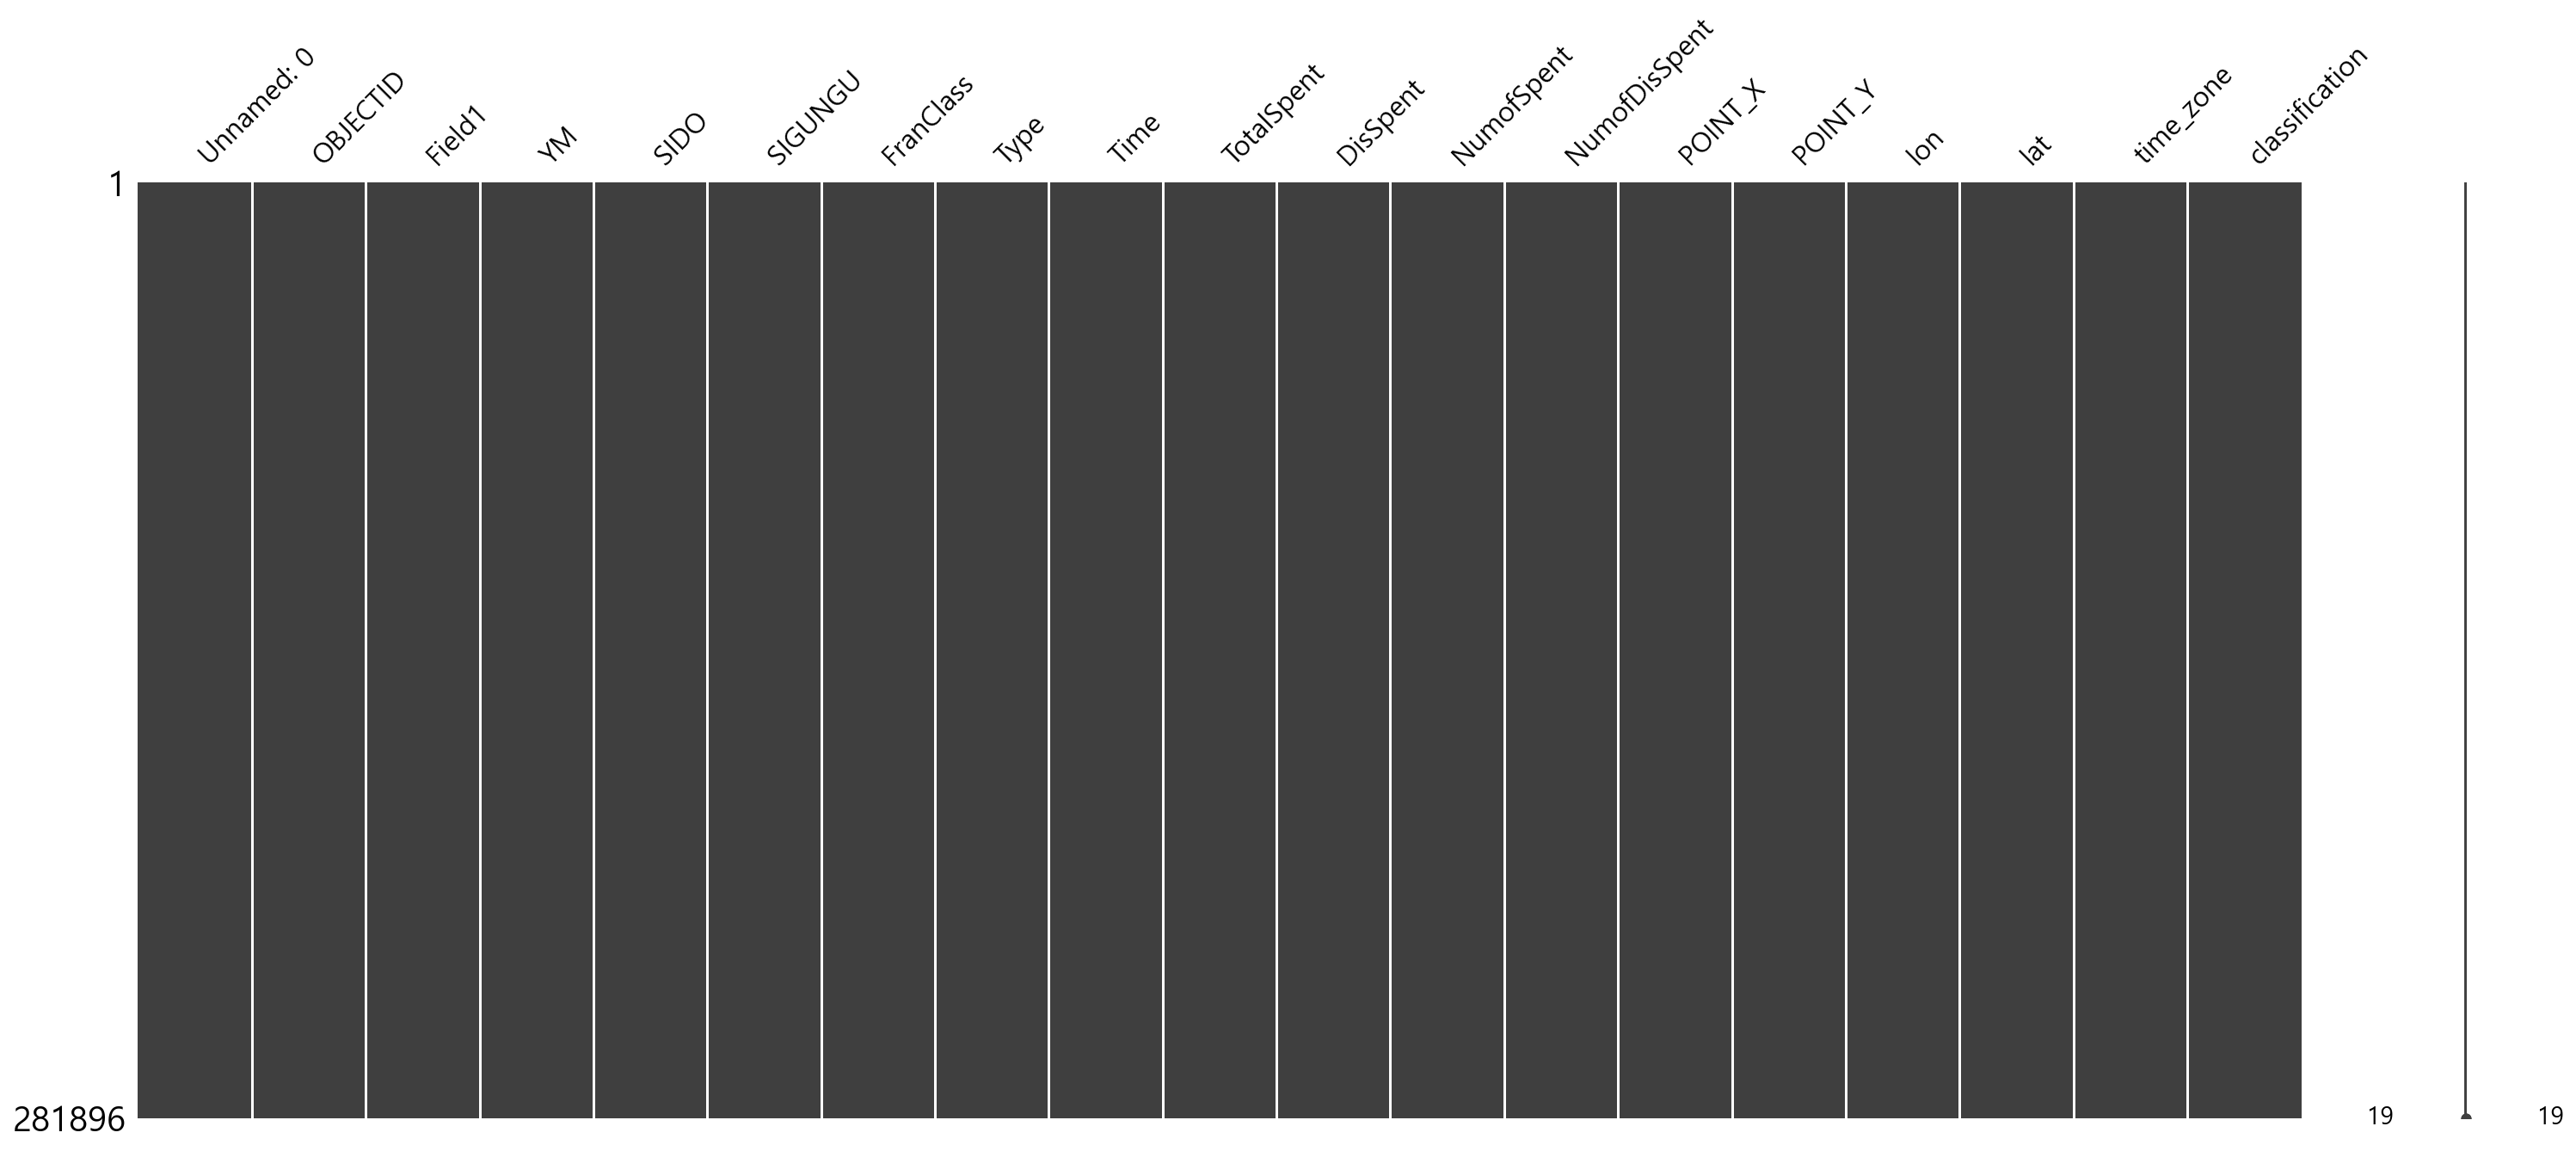

In [679]:
df_6 = pd.read_csv('./data/df_6.csv', sep=',',encoding='euc-kr')
msno.matrix(df_6)

In [680]:
df_5.head(2)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification
0,0,1,1,202005,제주특별자치도,제주시,영세,일반한식,0,363000,66500,10,2,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식
1,1,2,2,202005,제주특별자치도,제주시,영세,단란주점,0,1180000,0,3,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점


In [681]:
df_6.head(2)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification
0,0,1,1,202006,제주특별자치도,제주시,영세,일반한식,0,502000,0,10,0,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식
1,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,0,1520000,0,8,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점


In [682]:
raw_data_5 = pd.read_csv('./data/KRI-DAC_Jeju_data5.txt', sep=',')
raw_data_5.tail(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06
273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06


In [683]:
raw_data_6 = pd.read_csv('./data/KRI-DAC_Jeju_data6.txt', sep=',')
raw_data_6.tail(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
281894,281895,281895,202006,제주특별자치도,제주시,중소,제과점,x시,15000,0,2,0,950524.6587,1.500760e+06
281895,281896,281896,202006,제주특별자치도,제주시,중소1,중국음식,x시,15000,0,1,0,950574.6388,1.500760e+06


In [684]:
# int 와 if function하기전 불필요한 '시' 제거
df_6 ['Time'] = df_6 ['Time'].str.replace('시','')
df_6 .head(1)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification
0,0,1,1,202006,제주특별자치도,제주시,영세,일반한식,NaN,502000,0,10,0,877005.9834,1479766.073,126.178894,33.302315,심야,외식


In [685]:
raw_data_6['Time'] = raw_data_6['Time'].str.replace('시','')
raw_data_6.head(1)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,1,1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1479766.073


In [686]:
df_5_1 =  raw_data_5[['Time']]
df_5_1 = df_5_1.rename(columns={'Time':'TIME'})
df_5_1

,TIME
0,00시
1,00시
2,00시
3,00시
4,00시
...,...
273178,x시
273179,x시
273180,x시
273181,x시


In [687]:
df_6_1 =  raw_data_5[['Time']]
df_6_1 = df_6_1.rename(columns={'Time':'TIME'})
df_6_1

,TIME
0,00시
1,00시
2,00시
3,00시
4,00시
...,...
273178,x시
273179,x시
273180,x시
273181,x시


In [688]:
# 5월
df_5 = pd.merge(df_5,df_5_1,right_index=True,left_index=True)
df_5.head(2)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification,TIME
0,0,1,1,202005,제주특별자치도,제주시,영세,일반한식,0,363000,66500,10,2,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식,00시
1,1,2,2,202005,제주특별자치도,제주시,영세,단란주점,0,1180000,0,3,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점,00시


In [689]:
df_6 = pd.merge(df_6,df_6_1,right_index=True,left_index=True)
df_6.head(2)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification,TIME
0,0,1,1,202006,제주특별자치도,제주시,영세,일반한식,NaN,502000,0,10,0,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식,00시
1,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,NaN,1520000,0,8,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점,00시


In [690]:
df_5 = raw_data_5
df_5.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06


In [691]:
sigu_5 = df_5.groupby('SIGUNGU').sum()
sigu_5

,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
SIGUNGU,,,,,,,,,
서귀포시,10795509663,10795509663,15818607540,43133818669,5920539356,1313870,193500,7.145339e+10,1.156489e+11
제주시,26519102673,26519102673,39365724375,125553893530,18259555268,3837175,589269,1.769218e+11,2.923665e+11


In [692]:
ratio = [168687712199,24180094624]
labels = ['TotalSpent','DisSpent']

([<matplotlib.patches.Wedge at 0x25f4878ce80>,
 [Text(-1.0619473399381492, 0.44132510374812084, 'TotalSpent'),
  Text(1.0619473399381487, -0.44132510374812095, 'DisSpent')],
 [Text(-0.600231105182432, 0.2494446238576335, '87.5%'),
  Text(0.600231105182432, -0.24944462385763358, '12.5%')])

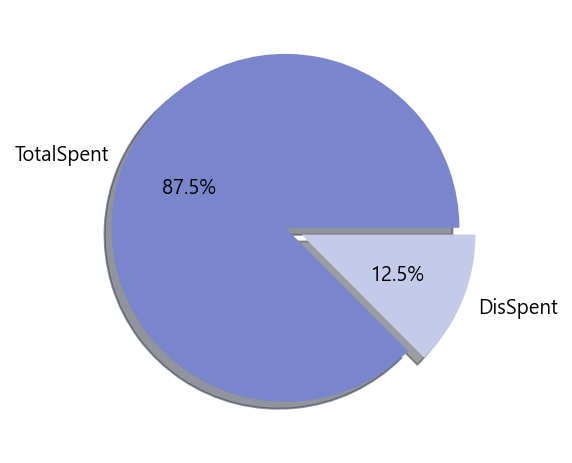

In [693]:
plt_5 = plt.pie(ratio, labels=labels, autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'])
plt_5

In [694]:
# 6월
df_6 = raw_data_6
df_6.head()
sigu_6 = df_6.groupby('SIGUNGU').sum()
sigu_6



,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
SIGUNGU,,,,,,,,,
서귀포시,11429475278,11429475278,16264917102,42917098989,2618650789,1322943,103982,7.347206e+10,1.189125e+11
제주시,28303343078,28303343078,40679766274,124061403275,7047698235,3862965,280360,1.828242e+11,3.021224e+11


([<matplotlib.patches.Wedge at 0x25f605fa0a0>,
 [Text(-1.1330480029271297, 0.1967288058796765, 'TotalSpent'),
  Text(1.133047996019974, -0.19672884566103094, 'DisSpent')],
 [Text(-0.6404184364370732, 0.1111945424537302, '94.5%'),
  Text(0.6404184325330285, -0.11119456493884355, '5.5%')])

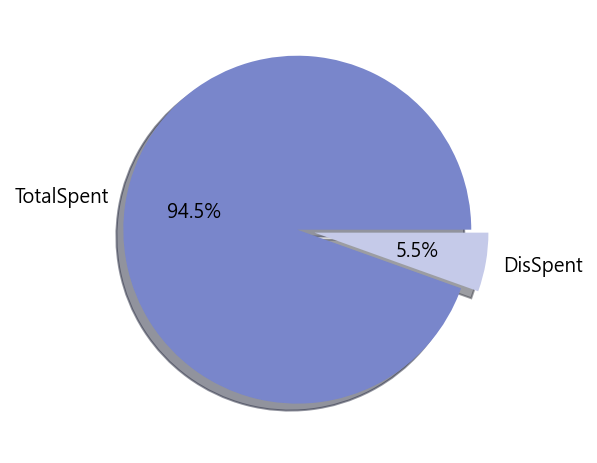

In [695]:
# 6월
ratio = [166978502264,9666349024]
labels = ['TotalSpent','DisSpent']
plt_6 = plt.pie(ratio, labels=labels, autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'])
plt_6

In [ ]:
# 시별 금액 비교

In [740]:
#5월
SI_TS_5 = df_5.groupby('SIGUNGU')['TotalSpent'].sum()
SI_TS_5 

SIGUNGU
서귀포시     43133818669
제주시     125553893530
Name: TotalSpent, dtype: int64

In [741]:
#6월
SI_TS_6= df_6.groupby('SIGUNGU')['TotalSpent'].sum()
SI_TS_6 

SIGUNGU
서귀포시     42917098989
제주시     124061403275
Name: TotalSpent, dtype: int64

In [735]:
#5월
SI_TS_5 = pd.DataFrame(SI_TS_5,columns=["TotalSpent"])
SI_TS_5

,TotalSpent
SIGUNGU,
서귀포시,43133818669
제주시,125553893530


In [699]:
df_5

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06
3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06
4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273178,273179,273179,202005,제주특별자치도,제주시,중소,침구수예점,x시,17000,0,1,0,949616.6171,1.502505e+06
273179,273180,273180,202005,제주특별자치도,제주시,중소1,서양음식,x시,12000,0,1,0,949665.1566,1.502805e+06
273180,273181,273181,202005,제주특별자치도,제주시,영세,편의점,x시,4800,0,1,0,950266.5976,1.502458e+06
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06


In [736]:
#6월
SI_TS_6 = pd.DataFrame(SI_TS_6,columns=["TotalSpent"])
SI_TS_6

,TotalSpent
SIGUNGU,
서귀포시,42917098989
제주시,124061403275


Text(0.5, 1.0, '5월 시군별 총 사용금액')

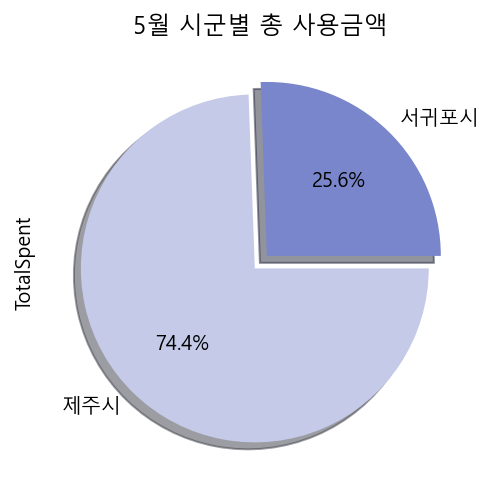

In [701]:
#5월
SI_TS_5['TotalSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9']).set_title('5월 시군별 총 사용금액')

Text(0.5, 1.0, '6월 시군별 총 사용금액')

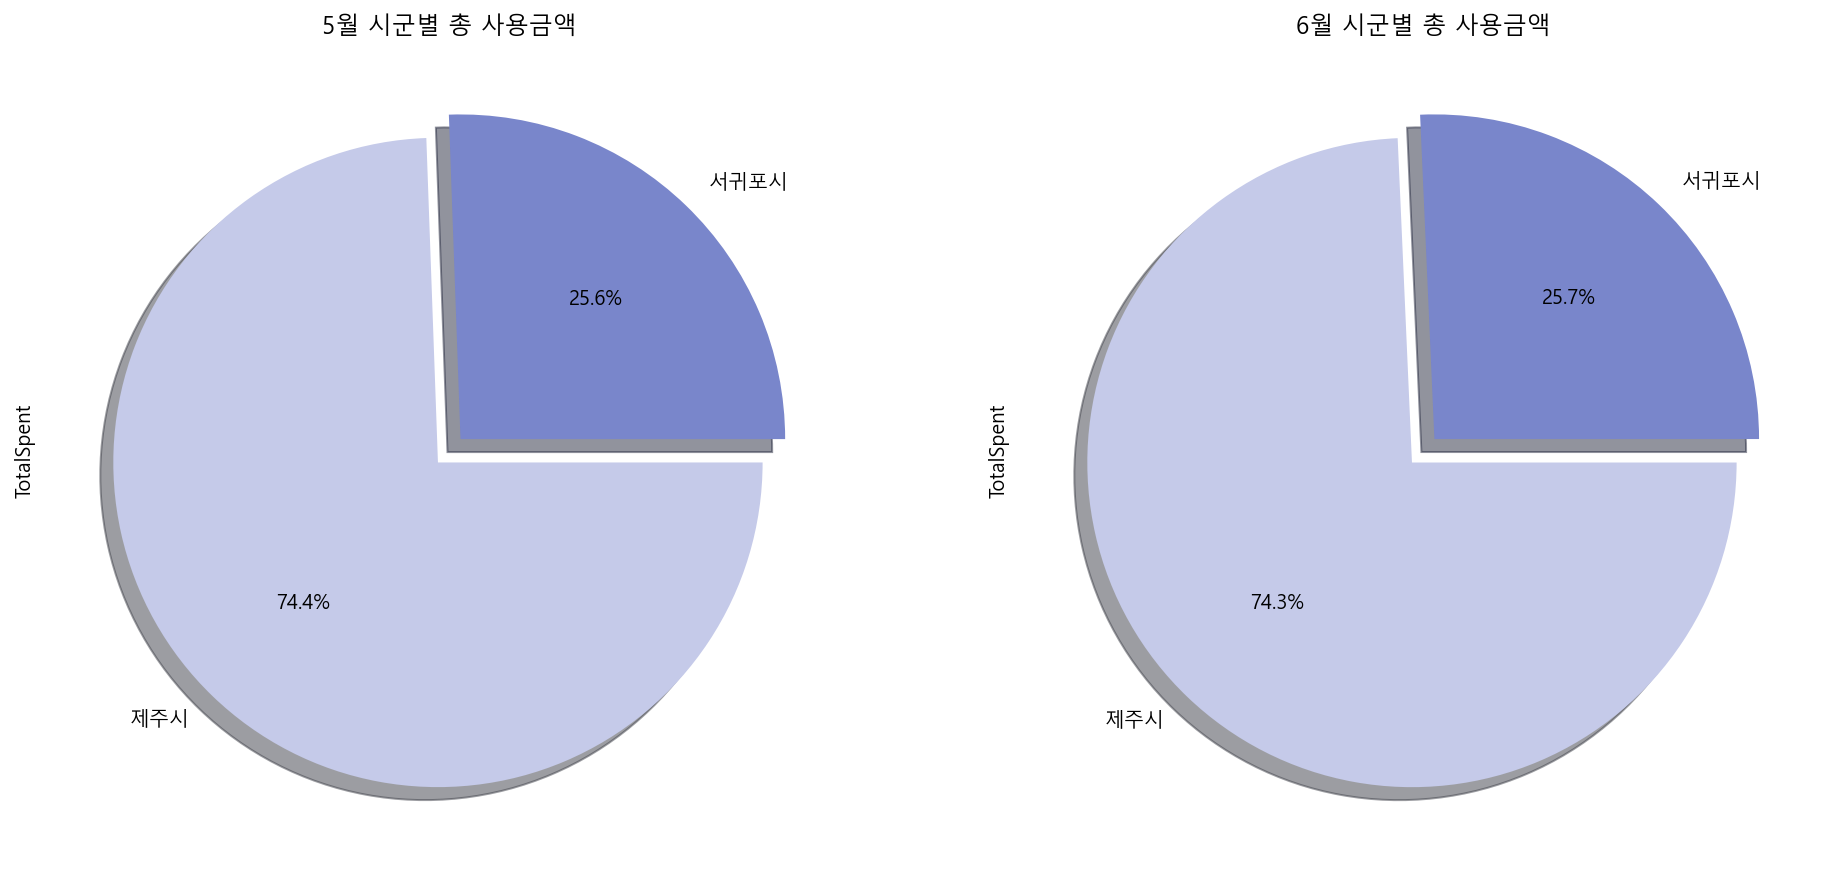

In [728]:
f, ax = plt.subplots(1,2,figsize=(16,8))
SI_TS_5['TotalSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'],ax=ax[0]).set_title('5월 시군별 총 사용금액')
SI_TS_6['TotalSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'],ax=ax[1]).set_title('6월 시군별 총 사용금액')


Text(0.5, 1.0, '5월 시군별 재난지원금 사용금액')

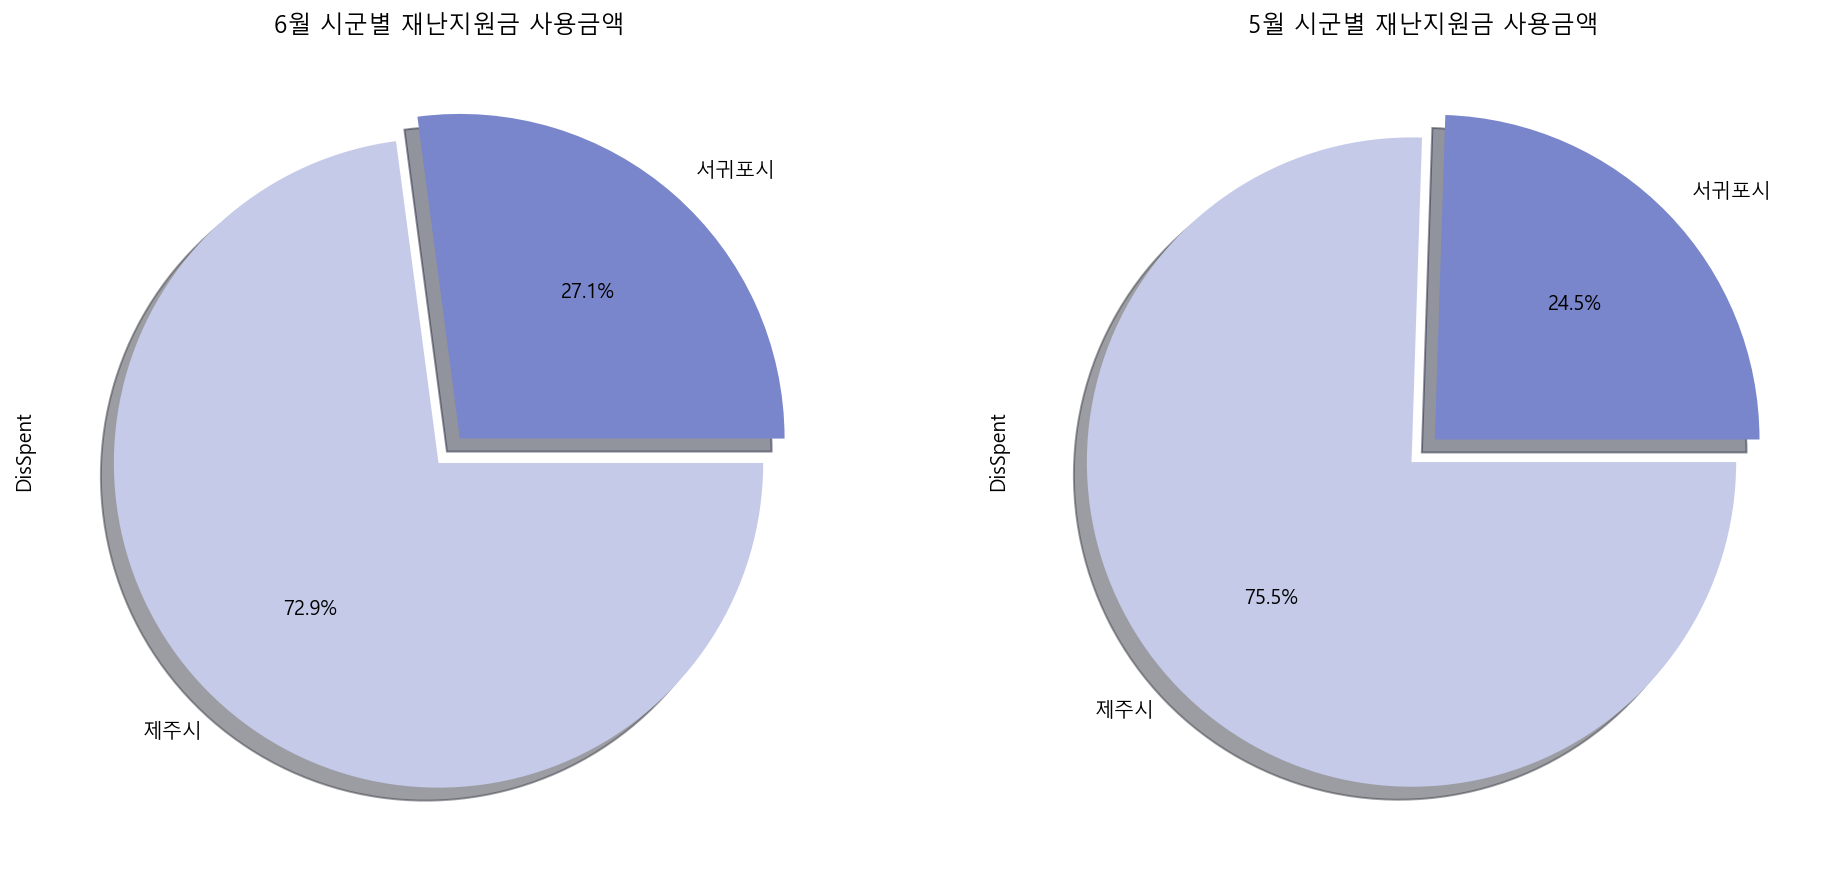

In [729]:
f, ax = plt.subplots(1,2,figsize=(16,8))

SI_DS_6['DisSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'],ax=ax[0]).set_title('6월 시군별 재난지원금 사용금액')
SI_DS_5['DisSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'],ax=ax[1]).set_title('5월 시군별 재난지원금 사용금액')

Text(0.5, 1.0, '6월 시군별 총 사용금액')

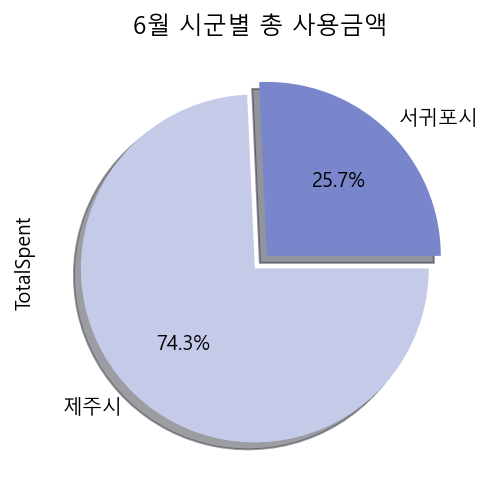

In [703]:
#6월
SI_TS_6['TotalSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9']).set_title('6월 시군별 총 사용금액')

In [738]:
# 5월
SI_DS_5 = df_5.groupby('SIGUNGU')['DisSpent'].sum()
SI_DS_5

SIGUNGU
서귀포시     5920539356
제주시     18259555268
Name: DisSpent, dtype: int64

In [739]:
# 6월
SI_DS_6 = df_6.groupby('SIGUNGU')['DisSpent'].sum()
SI_DS_6

SIGUNGU
서귀포시    2618650789
제주시     7047698235
Name: DisSpent, dtype: int64

In [732]:
# 5월
SI_DS_5 = pd.DataFrame(SI_DS_5,columns=['DisSpent'])
SI_DS_5

,DisSpent
SIGUNGU,
서귀포시,5920539356
제주시,18259555268


In [734]:
# 6월
SI_DS_6 = pd.DataFrame(SI_DS_6,columns=['DisSpent'])
SI_DS_6

,DisSpent
SIGUNGU,
서귀포시,2618650789
제주시,7047698235


Text(0.5, 1.0, '5월 시군별 재난지원금 사용금액')

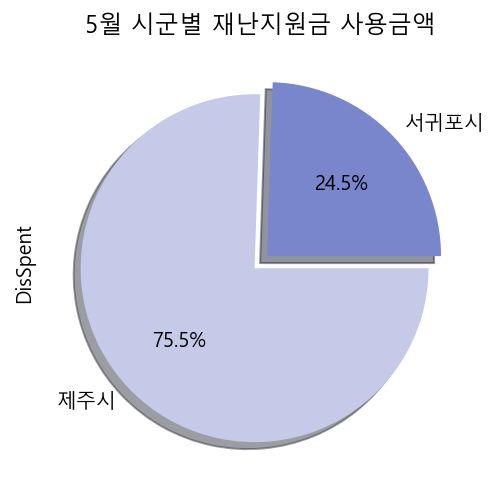

In [707]:
#5월
SI_DS_5['DisSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9']).set_title('5월 시군별 재난지원금 사용금액')

Text(0.5, 1.0, '6월 시군별 재난지원금 사용금액')

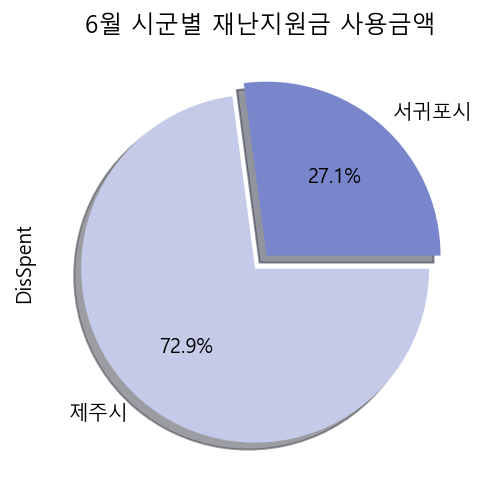

In [708]:
#6월
SI_DS_6['DisSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9']).set_title('6월 시군별 재난지원금 사용금액')

In [742]:
# 5월
SI_DS_5/SI_TS_5*100

SIGUNGU
서귀포시    13.725980
제주시     14.543201
dtype: float64

In [743]:
# 6월
SI_DS_6/SI_TS_6*100

SIGUNGU
서귀포시    6.101649
제주시     5.680815
dtype: float64

In [744]:
#5월
SI_DS_TS_5 = pd.DataFrame(SI_DS_5/SI_TS_5*100,columns=["SIGUNGU"])
SI_DS_TS_5

,SIGUNGU
SIGUNGU,
서귀포시,13.725980
제주시,14.543201


In [745]:
#6월
SI_DS_TS_6 = pd.DataFrame(SI_DS_6/SI_TS_5*100,columns=["SIGUNGU"])
SI_DS_TS_6

,SIGUNGU
SIGUNGU,
서귀포시,6.070992
제주시,5.613285


In [ ]:
# 시군별 재난지원금이용건수

In [468]:
# 5월
SI_NS_5 = df_5.groupby('SIGUNGU')['NumofSpent'].sum()
SI_NS_5

SIGUNGU
서귀포시    1313870
제주시     3837175
Name: NumofSpent, dtype: int64

In [476]:
# 5월
SI_NS_5_1 = pd.DataFrame(SI_NS_5,columns=['NumofSpent'])
SI_NS_5_1

,NumofSpent
SIGUNGU,
서귀포시,1313870
제주시,3837175


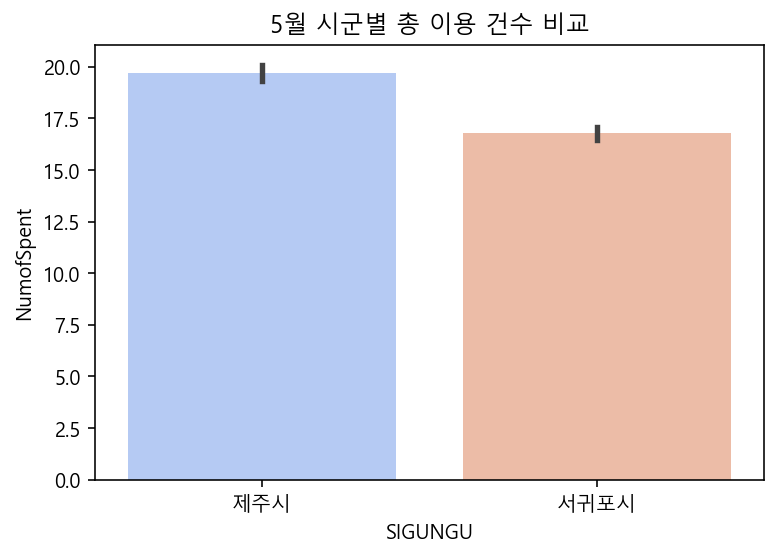

In [479]:
# 5월
sns.barplot(x='SIGUNGU',y='NumofSpent',data=df_5, palette='coolwarm').set_title('5월 시군별 총 이용 건수 비교')
plt.show()

In [485]:
SI_NDS_5 = df_5.groupby('SIGUNGU')['NumofDisSpent'].sum()
SI_NDS_5

SIGUNGU
서귀포시    193500
제주시     589269
Name: NumofDisSpent, dtype: int64

In [487]:
# 5월
SI_NDS_5_1 = pd.DataFrame(SI_NDS_5,columns=['NumofDisSpent'])
SI_NDS_5_1

,NumofDisSpent
SIGUNGU,
서귀포시,193500
제주시,589269


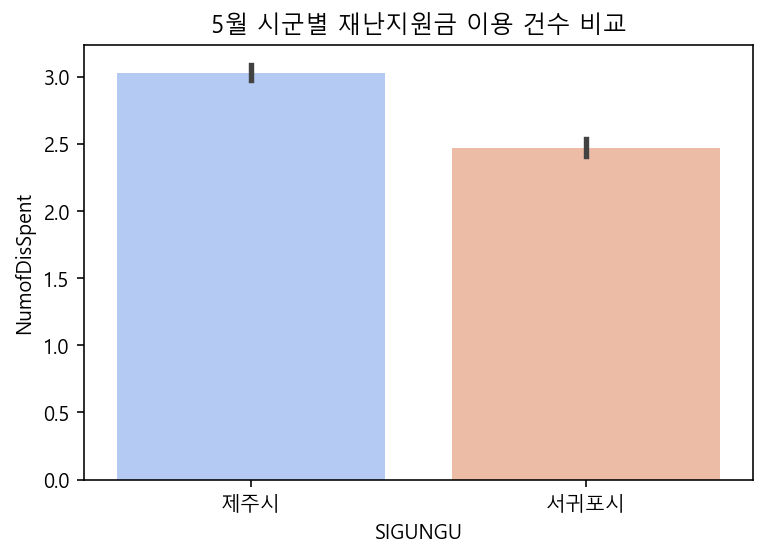

In [488]:
# 5월
sns.barplot(x='SIGUNGU',y='NumofDisSpent',data=df_5, palette='coolwarm').set_title('5월 시군별 재난지원금 이용 건수 비교')
plt.show()

In [495]:
# 5월
SI_NDS_5/SI_NS_5*100

SIGUNGU
서귀포시    14.727484
제주시     15.356845
dtype: float64

In [496]:
# 5월
SI_NDS_NS_5 = pd.DataFrame(SI_NDS_5/SI_NS_5*100,columns=["SIGUNGU"])
SI_NDS_NS_5

,SIGUNGU
SIGUNGU,
서귀포시,14.727484
제주시,15.356845


In [ ]:
# 5월
SI_DS_TS["SIGUNGU"].plot.pie(autopct = '%1.1f%%'
                             ,explode=[0.05, 0.05], shadow=True, colors= ['#7986CB', '#C5CAE9']
                            ).set_title('5월 시군별 재난지원금 사용 비율(%)')

In [500]:
# 6월
SI_NS_6 = df_6.groupby('SIGUNGU')['NumofSpent'].sum()
SI_NS_6

SIGUNGU
서귀포시    1286117
제주시     3766609
Name: NumofSpent, dtype: int64

In [501]:
# 6월
SI_NS_6_1 = pd.DataFrame(SI_NDS_6,columns=['NumofSpent'])
SI_NS_6_1

,NumofSpent
SIGUNGU,
서귀포시,1286117
제주시,3766609


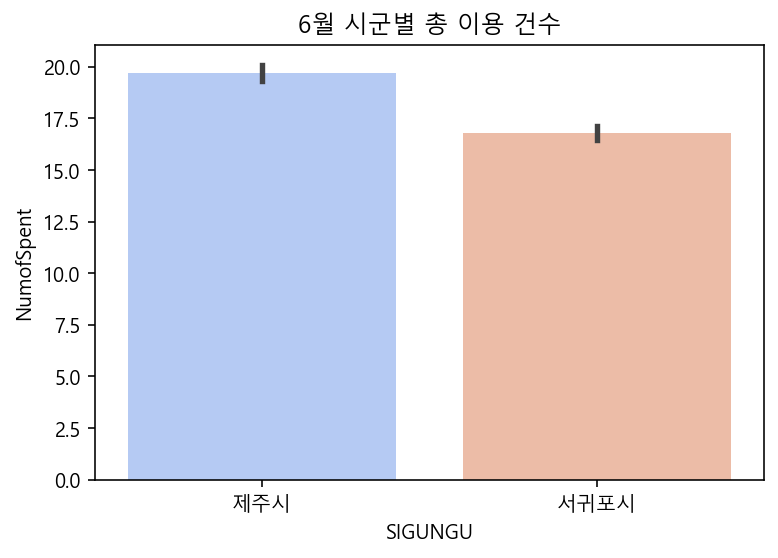

In [502]:
# 6월
sns.barplot(x='SIGUNGU',y='NumofSpent',data=df_5, palette='coolwarm').set_title('6월 시군별 총 이용 건수')
plt.show()

In [503]:
# 6월
SI_NDS_6 = df_6.groupby('SIGUNGU')['NumofDisSpent'].sum()
SI_NDS_6

SIGUNGU
서귀포시    103982
제주시     280360
Name: NumofDisSpent, dtype: int64

In [504]:
# 6월
SI_NDS_6_1 = pd.DataFrame(SI_NDS_6,columns=['NumofDisSpent'])
SI_NDS_6_1

,NumofDisSpent
SIGUNGU,
서귀포시,103982
제주시,280360


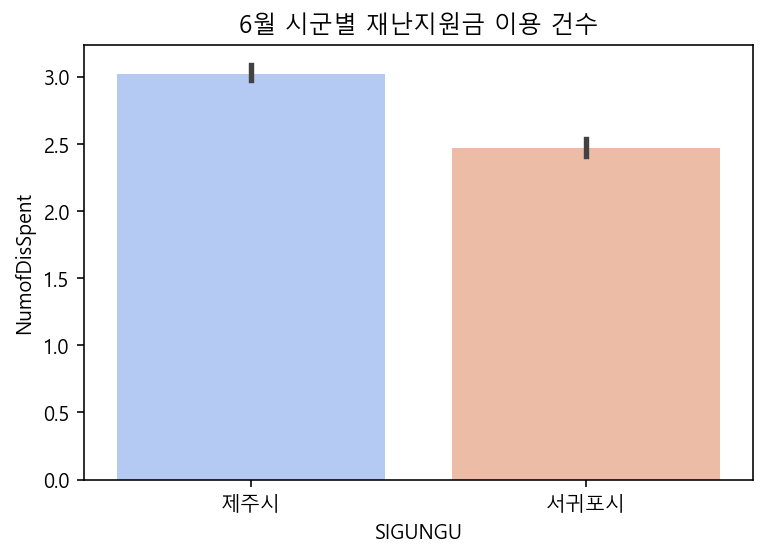

In [505]:
# 6월
sns.barplot(x='SIGUNGU',y='NumofDisSpent',data=df_5, palette='coolwarm').set_title('6월 시군별 재난지원금 이용 건수')
plt.show()

In [506]:
# 6월
SI_NDS_6/SI_NS_6*100

SIGUNGU
서귀포시    8.084957
제주시     7.443300
dtype: float64

In [508]:
# 6월
SI_NDS_NS = pd.DataFrame(SI_NDS_6/SI_NS_6*100,columns=["SIGUNGU"])
SI_NDS_NS

,SIGUNGU
SIGUNGU,
서귀포시,8.084957
제주시,7.443300


Text(0.5, 1.0, '5월 시군별 재난지원금 사용 건수 비율(%)')

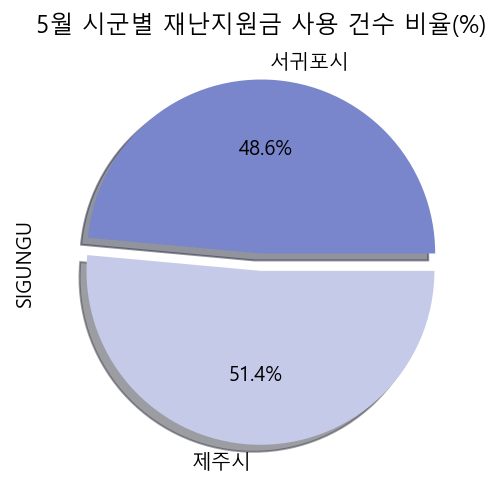

In [510]:
# 5월
SI_DS_TS_5["SIGUNGU"].plot.pie(autopct = '%1.1f%%'
                             ,explode=[0.05, 0.05], shadow=True, colors= ['#7986CB', '#C5CAE9']
                            ).set_title('5월 시군별 재난지원금 사용 건수 비율(%)')

Text(0.5, 1.0, '6월 시군별 재난지원금 사용 건수 비율(%)')

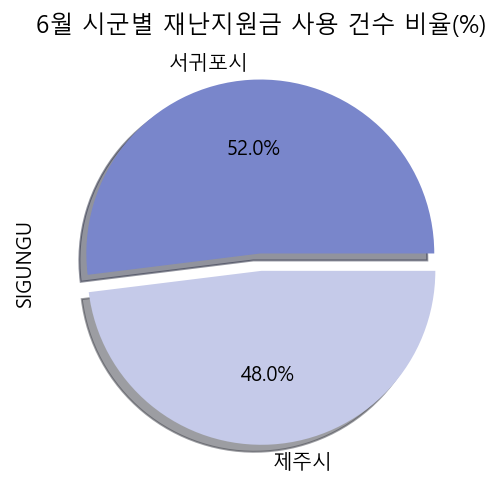

In [509]:
# 6월
SI_DS_TS_6["SIGUNGU"].plot.pie(autopct = '%1.1f%%'
                             ,explode=[0.05, 0.05], shadow=True, colors= ['#7986CB', '#C5CAE9']
                            ).set_title('6월 시군별 재난지원금 사용 건수 비율(%)')

In [357]:
num_jeju_type_5 = (jeju_type_5[col]) / (jeju_type_5[col].max())
num_jeju_type_5

,NumofSpent,NumofDisSpent
0,0.112458,0.082125
1,0.072534,0.036853
2,0.320508,0.175361
3,0.298994,0.264151
4,1.000000,1.000000
5,0.179415,0.075642
6,0.186261,0.058427
7,0.027384,0.019779
8,0.051395,0.044904
9,0.127005,0.069900


In [363]:
# 5월
jeju_type_5 = df_5.groupby(['classification'], as_index=False).mean()
jeju_type_5
norm_jeju_type_5 = jeju_type_5.copy()
norm_jeju_type_5
col = ['NumofSpent', 'NumofDisSpent']
col
num_jeju_type_5 = (jeju_type_5[col]) / (jeju_type_5[col].max())
num_jeju_type_5
norm_jeju_type_5 = jeju_type_5.copy()
norm_jeju_type_5

,classification,Unnamed: 0,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
0,건축/기타,107454.833542,107455.833542,107455.833542,202005.0,6.023420e+05,97492.017661,8.232652,1.529412,909349.182613,1.494058e+06,126.524825,33.434344
1,교육/학원,139847.094044,139848.094044,139848.094044,202005.0,7.656553e+05,60064.800622,5.309956,0.686311,908442.701365,1.495360e+06,126.514943,33.446048
2,교통/자동차,116230.310558,116231.310558,116231.310558,202005.0,1.129001e+06,175283.242145,23.463139,3.265732,909019.973730,1.494640e+06,126.521232,33.439563
3,기타농업관련,97758.608696,97759.608696,97759.608696,202005.0,1.845465e+06,326784.881988,21.888199,4.919255,909844.276255,1.485234e+06,126.531082,33.354758
4,농업,106112.115990,106113.115990,106113.115990,202005.0,2.977056e+06,848263.402387,73.206205,18.622912,907800.412277,1.488655e+06,126.508764,33.385412
5,레저/스포츠,137756.625605,137757.625605,137757.625605,202005.0,7.889602e+05,97716.271529,13.134296,1.408683,908399.442140,1.494227e+06,126.514596,33.435804
6,문화/오락,147413.215377,147414.215377,147414.215377,202005.0,4.547525e+05,33642.735998,13.635438,1.088086,909908.232778,1.493465e+06,126.530917,33.429032
7,미용,143832.592344,143833.592344,143833.592344,202005.0,1.874647e+05,26676.989136,2.004656,0.368339,908412.454818,1.495511e+06,126.514600,33.447407
8,미용원,138723.211753,138724.211753,138724.211753,202005.0,1.490023e+05,35816.157421,3.762411,0.836246,908455.261306,1.494872e+06,126.515122,33.441643
9,생활/인테리어,123005.688427,123006.688427,123006.688427,202005.0,3.032004e+05,55084.643778,9.297550,1.301741,908480.468144,1.494935e+06,126.515395,33.442200


In [349]:
# 5월
norm_jeju_type_5 = jeju_type_5.copy()
norm_jeju_type_5

,classification,Unnamed: 0,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
0,건축/기타,107454.833542,107455.833542,107455.833542,202005.0,6.023420e+05,97492.017661,8.232652,1.529412,909349.182613,1.494058e+06,126.524825,33.434344
1,교육/학원,139847.094044,139848.094044,139848.094044,202005.0,7.656553e+05,60064.800622,5.309956,0.686311,908442.701365,1.495360e+06,126.514943,33.446048
2,교통/자동차,116230.310558,116231.310558,116231.310558,202005.0,1.129001e+06,175283.242145,23.463139,3.265732,909019.973730,1.494640e+06,126.521232,33.439563
3,기타농업관련,97758.608696,97759.608696,97759.608696,202005.0,1.845465e+06,326784.881988,21.888199,4.919255,909844.276255,1.485234e+06,126.531082,33.354758
4,농업,106112.115990,106113.115990,106113.115990,202005.0,2.977056e+06,848263.402387,73.206205,18.622912,907800.412277,1.488655e+06,126.508764,33.385412
5,레저/스포츠,137756.625605,137757.625605,137757.625605,202005.0,7.889602e+05,97716.271529,13.134296,1.408683,908399.442140,1.494227e+06,126.514596,33.435804
6,문화/오락,147413.215377,147414.215377,147414.215377,202005.0,4.547525e+05,33642.735998,13.635438,1.088086,909908.232778,1.493465e+06,126.530917,33.429032
7,미용,143832.592344,143833.592344,143833.592344,202005.0,1.874647e+05,26676.989136,2.004656,0.368339,908412.454818,1.495511e+06,126.514600,33.447407
8,미용원,138723.211753,138724.211753,138724.211753,202005.0,1.490023e+05,35816.157421,3.762411,0.836246,908455.261306,1.494872e+06,126.515122,33.441643
9,생활/인테리어,123005.688427,123006.688427,123006.688427,202005.0,3.032004e+05,55084.643778,9.297550,1.301741,908480.468144,1.494935e+06,126.515395,33.442200


In [ ]:
f, ax = plt.subplots(1,2,figsize=(16,8))

SI_DS_6['DisSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'],ax=ax[0]).set_title('6월 시군별 재난지원금 사용금액')
SI_DS_5['DisSpent'].plot.pie(autopct = '%1.1f%%',explode= [0.05, 0.05],shadow=True,colors = ['#7986CB', '#C5CAE9'],ax=ax[1]).set_title('5월 시군별 재난지원금 사용금액')

Text(0.5, 1.0, '5월 상위 5개 업종별 총 이용 건수')

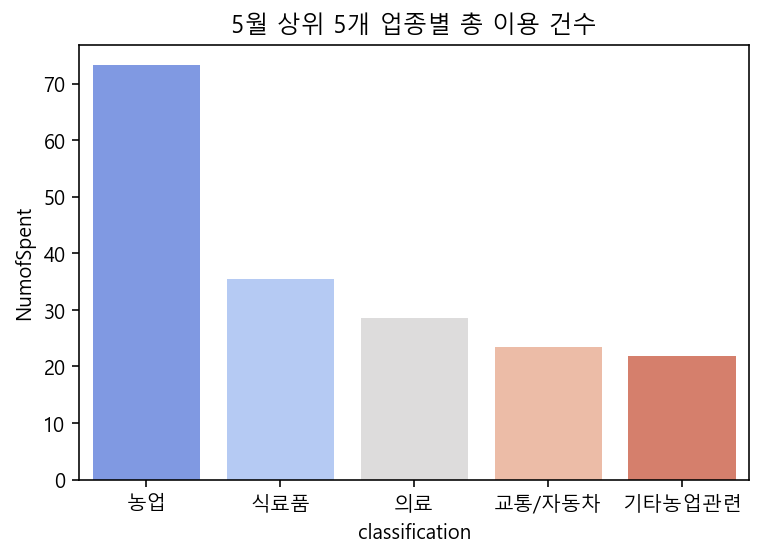

In [408]:

sns.barplot(x='classification', y='NumofSpent', data=norm_jeju_type_5.nlargest(5, 'NumofSpent'), palette='coolwarm').set_title('5월 상위 5개 업종별 총 이용 건수')

Text(0.5, 1.0, '5월 상위 5개 업종별 재난이용금 이용 건수')

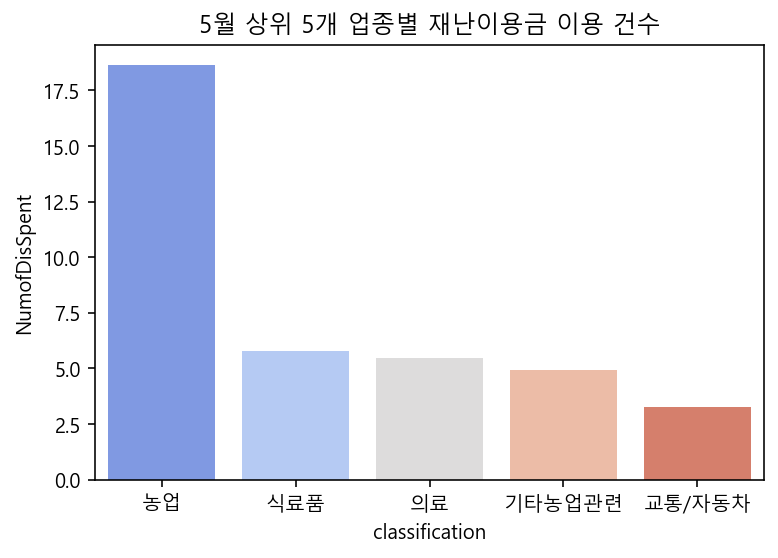

In [748]:
sns.barplot(x='classification', y='NumofDisSpent', data=norm_jeju_type_5.nlargest(5, 'NumofDisSpent'), palette='coolwarm').set_title('5월 상위 5개 업종별 재난이용금 이용 건수')

In [511]:
# 6월
jeju_type_6 = df_6.groupby(['classification'], as_index=False).mean()
jeju_type_6
norm_jeju_type_6 = jeju_type_6.copy()
norm_jeju_type_6
col = ['NumofSpent', 'NumofDisSpent']
col
num_jeju_type_6 = (jeju_type_6[col]) / (jeju_type_6[col].max())
num_jeju_type_6
norm_jeju_type_6 = jeju_type_6.copy()
norm_jeju_type_6

,classification,Unnamed: 0,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
0,건축/기타,107525.470770,107526.470770,107526.470770,202006.0,5.866426e+05,30205.207206,7.999299,0.684425,909257.172205,1.494057e+06,126.523836,33.434336
1,교육/학원,143665.394086,143666.394086,143666.394086,202006.0,7.356015e+05,25978.181134,5.199896,0.327512,908135.383271,1.495264e+06,126.511648,33.445152
2,교통/자동차,116567.984246,116568.984246,116568.984246,202006.0,1.109965e+06,72000.187627,24.318524,1.617400,908779.362523,1.494621e+06,126.518646,33.439374
3,기타농업관련,96075.819209,96076.819209,96076.819209,202006.0,2.010011e+06,162417.389831,17.926554,2.847458,908427.653918,1.484572e+06,126.515944,33.348657
4,농업,105771.479848,105772.479848,105772.479848,202006.0,2.739209e+06,409791.823613,68.103841,11.293978,907566.117080,1.488589e+06,126.506255,33.384798
5,레저/스포츠,136634.194666,136635.194666,136635.194666,202006.0,6.682338e+05,24057.092038,11.769108,0.455414,908297.342942,1.494161e+06,126.513508,33.435198
6,문화/오락,145247.318077,145248.318077,145248.318077,202006.0,3.977700e+05,10257.567755,13.289792,0.427359,909609.036868,1.493429e+06,126.527708,33.428683
7,미용,147767.637214,147768.637214,147768.637214,202006.0,1.822380e+05,7600.699584,1.933992,0.143451,908212.842245,1.494663e+06,126.512541,33.439741
8,미용원,139917.590770,139918.590770,139918.590770,202006.0,1.284044e+05,11983.315137,3.458706,0.350933,908238.902674,1.494971e+06,126.512784,33.442517
9,생활/인테리어,123152.142810,123153.142810,123153.142810,202006.0,2.788500e+05,18604.276756,8.989823,0.566481,908244.937160,1.494820e+06,126.512875,33.441136


In [512]:
# 6월
norm_jeju_type_6 = jeju_type_6.copy()
norm_jeju_type_6

,classification,Unnamed: 0,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
0,건축/기타,107525.470770,107526.470770,107526.470770,202006.0,5.866426e+05,30205.207206,7.999299,0.684425,909257.172205,1.494057e+06,126.523836,33.434336
1,교육/학원,143665.394086,143666.394086,143666.394086,202006.0,7.356015e+05,25978.181134,5.199896,0.327512,908135.383271,1.495264e+06,126.511648,33.445152
2,교통/자동차,116567.984246,116568.984246,116568.984246,202006.0,1.109965e+06,72000.187627,24.318524,1.617400,908779.362523,1.494621e+06,126.518646,33.439374
3,기타농업관련,96075.819209,96076.819209,96076.819209,202006.0,2.010011e+06,162417.389831,17.926554,2.847458,908427.653918,1.484572e+06,126.515944,33.348657
4,농업,105771.479848,105772.479848,105772.479848,202006.0,2.739209e+06,409791.823613,68.103841,11.293978,907566.117080,1.488589e+06,126.506255,33.384798
5,레저/스포츠,136634.194666,136635.194666,136635.194666,202006.0,6.682338e+05,24057.092038,11.769108,0.455414,908297.342942,1.494161e+06,126.513508,33.435198
6,문화/오락,145247.318077,145248.318077,145248.318077,202006.0,3.977700e+05,10257.567755,13.289792,0.427359,909609.036868,1.493429e+06,126.527708,33.428683
7,미용,147767.637214,147768.637214,147768.637214,202006.0,1.822380e+05,7600.699584,1.933992,0.143451,908212.842245,1.494663e+06,126.512541,33.439741
8,미용원,139917.590770,139918.590770,139918.590770,202006.0,1.284044e+05,11983.315137,3.458706,0.350933,908238.902674,1.494971e+06,126.512784,33.442517
9,생활/인테리어,123152.142810,123153.142810,123153.142810,202006.0,2.788500e+05,18604.276756,8.989823,0.566481,908244.937160,1.494820e+06,126.512875,33.441136


Text(0.5, 1.0, '6월 상위 5개 업종별 총 이용 건수')

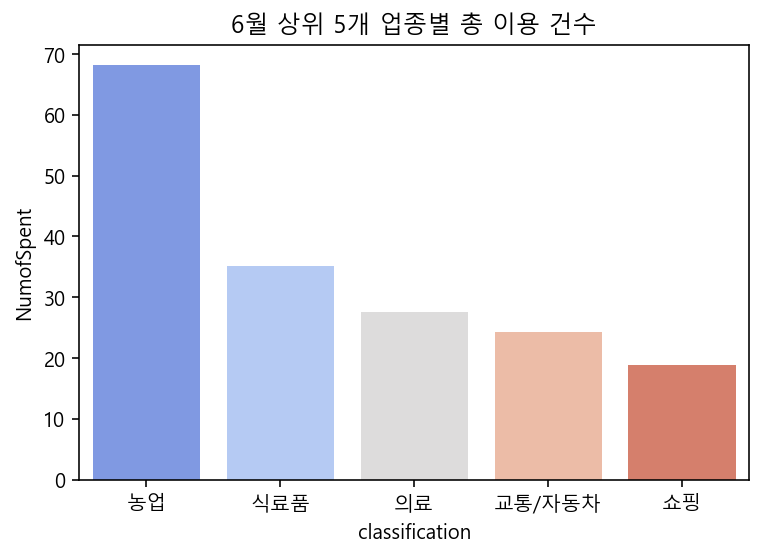

In [513]:
# 6월
sns.barplot(x='classification', y='NumofSpent', data=norm_jeju_type_6.nlargest(5, 'NumofSpent'), palette='coolwarm').set_title('6월 상위 5개 업종별 총 이용 건수')

Text(0.5, 1.0, '6월 상위 5개 업종별 재난지원금 이용 건수')

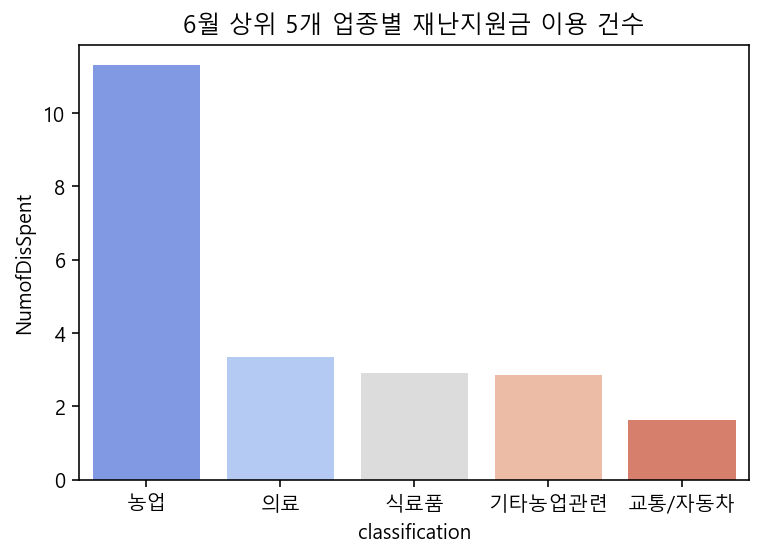

In [747]:
# 6월
sns.barplot(x='classification', y='NumofDisSpent', data=norm_jeju_type_6.nlargest(5, 'NumofDisSpent'), palette='coolwarm').set_title('6월 상위 5개 업종별 재난지원금 이용 건수')

Text(0.5, 1.0, '시군별 재난지원금 사용 비율-5월(%)')

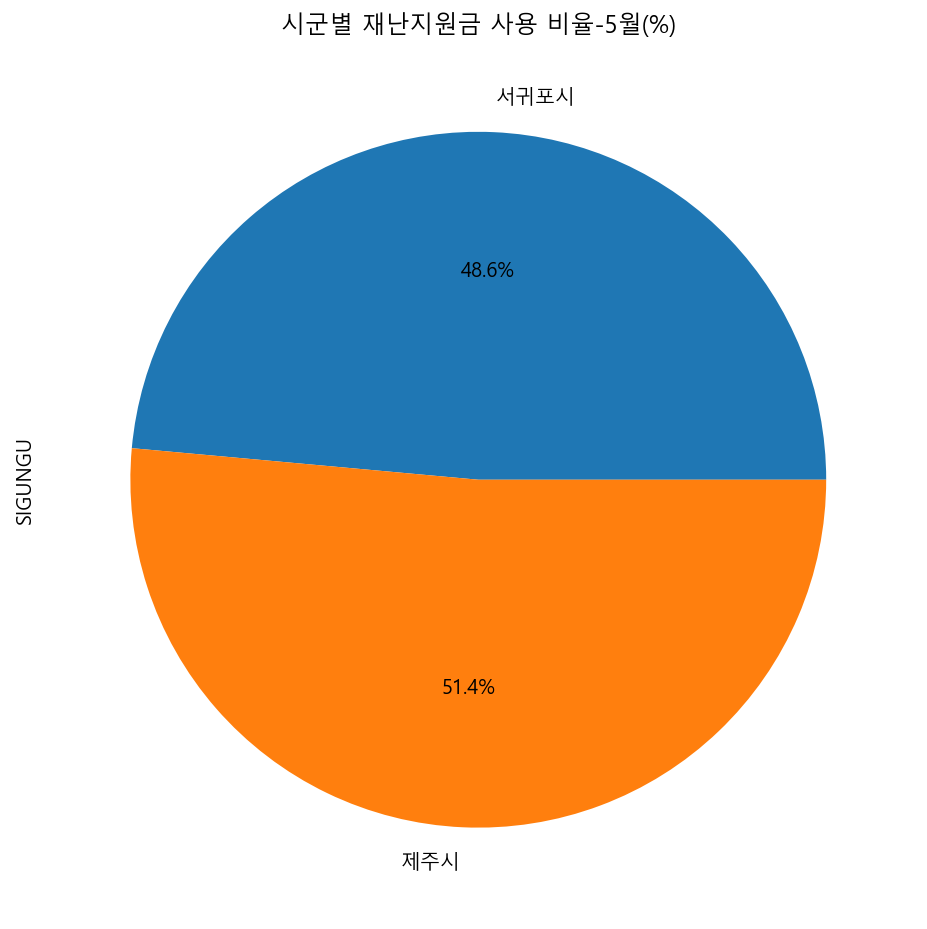

In [157]:
plt.figure(figsize=(16,8))
SI_NDS_NS["SIGUNGU"].plot.pie(autopct = '%1.1f%%').set_title('시군별 재난지원금 사용 비율-5월(%)')

In [ ]:
# 소상공인 별 비교

In [518]:
# 5월
TotalSpent_FC_TS_5 = df_5.groupby('FranClass')['TotalSpent'].sum()
TotalSpent_FC_TS_5

FranClass
영세     38075428110
일반     72954232828
중소     16352174700
중소1    21105202586
중소2    20200673975
Name: TotalSpent, dtype: int64

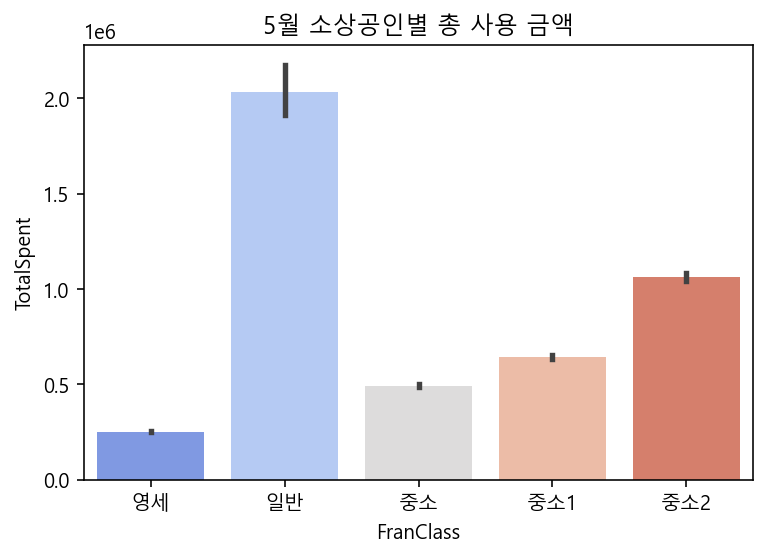

In [519]:
# 5월
sns.barplot(x='FranClass',y='TotalSpent',data=df_5,order=['영세','일반','중소','중소1','중소2'],palette='coolwarm').set_title('5월 소상공인별 총 사용 금액')
plt.show()

In [523]:
# 5월
DissSpent_FC_DS_5 = df_5.groupby('FranClass')['DisSpent'].sum()
DissSpent_FC_DS_5

FranClass
영세     5884366379
일반     9552976062
중소     2296089334
중소1    3285220071
중소2    3161442778
Name: DisSpent, dtype: int64

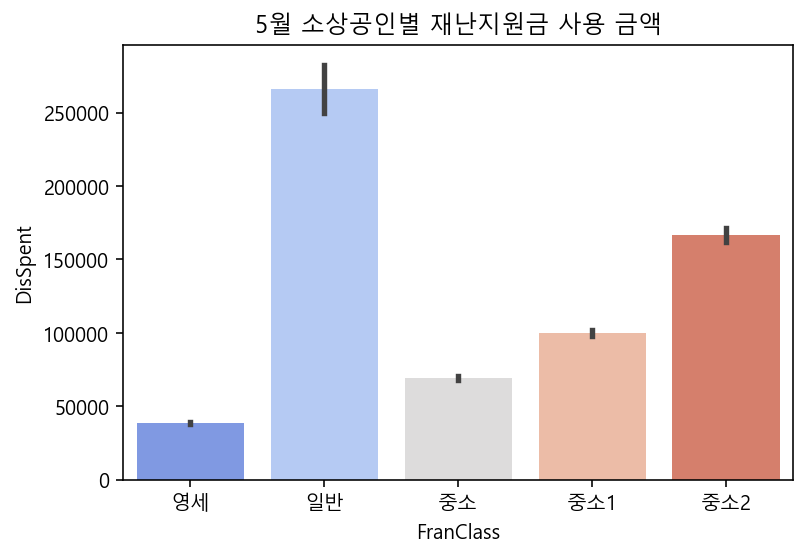

In [521]:
# 5월
sns.barplot(x='FranClass',y='DisSpent',data=df_5,order=['영세','일반','중소','중소1','중소2'],palette='coolwarm').set_title('5월 소상공인별 재난지원금 사용 금액')
plt.show()

In [524]:
# 5월
DissSpent_FC_DS_5/TotalSpent_FC_TS_5*100

FranClass
영세     15.454498
일반     13.094478
중소     14.041492
중소1    15.565925
중소2    15.650185
dtype: float64

In [525]:
FC_DS_TS_5 = pd.DataFrame(DissSpent_FC_DS_5/TotalSpent_FC_TS_5*100,columns=["FranClass"])
FC_DS_TS_5

,FranClass
FranClass,
영세,15.454498
일반,13.094478
중소,14.041492
중소1,15.565925
중소2,15.650185


In [526]:
# 6월
TotalSpent_FC_TS_6 = df_6.groupby('FranClass')['TotalSpent'].sum()
TotalSpent_FC_TS_6

FranClass
영세     35193925725
일반     72789938253
중소     15514027146
중소1    19898725672
중소2    19004921189
Name: TotalSpent, dtype: int64

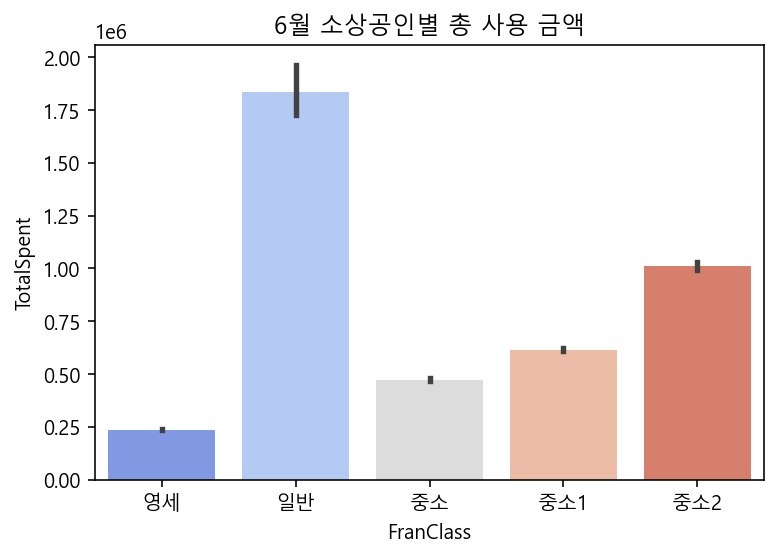

In [529]:
# 6월
sns.barplot(x='FranClass',y='TotalSpent',data=df_6,order=['영세','일반','중소','중소1','중소2'],palette='coolwarm').set_title('6월 소상공인별 총 사용 금액')
plt.show()

In [530]:
# 6월
DissSpent_FC_DS_6 = df_6.groupby('FranClass')['DisSpent'].sum()
DissSpent_FC_DS_6

FranClass
영세     2180389619
일반     4108500921
중소      886040496
중소1    1270086023
중소2    1221331965
Name: DisSpent, dtype: int64

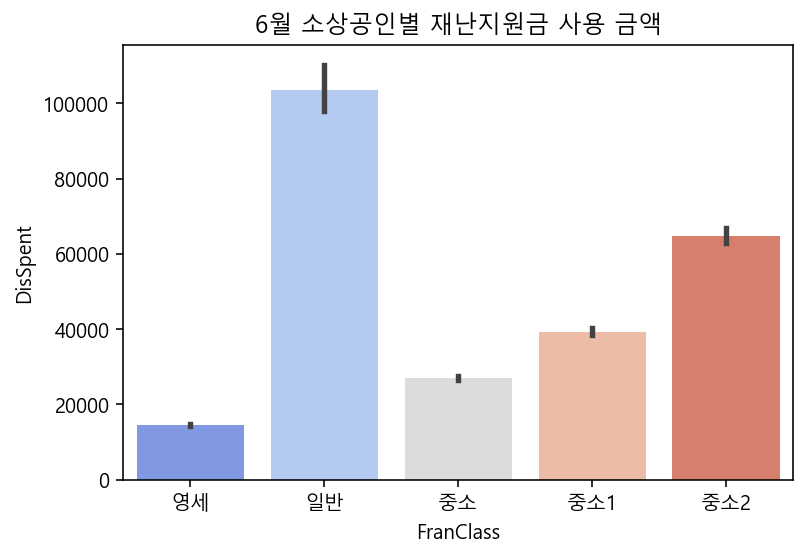

In [531]:
# 6월
sns.barplot(x='FranClass',y='DisSpent',data=df_6,order=['영세','일반','중소','중소1','중소2'],palette='coolwarm').set_title('6월 소상공인별 재난지원금 사용 금액')
plt.show()

In [532]:
# 6월
DissSpent_FC_DS_6/TotalSpent_FC_TS_6*100

FranClass
영세     6.195358
일반     5.644325
중소     5.711222
중소1    6.382751
중소2    6.426398
dtype: float64

In [534]:
FC_DS_TS_6 = pd.DataFrame(DissSpent_FC_DS_6/TotalSpent_FC_TS_6*100,columns=["FranClass"])
FC_DS_TS_6

,FranClass
FranClass,
영세,6.195358
일반,5.644325
중소,5.711222
중소1,6.382751
중소2,6.426398


In [ ]:
# 시간별 비교

In [538]:
# 5월
Time_TS_5 = df_5.groupby('TIME')['TotalSpent'].sum()
Time_TS_5.head(2)

TIME
00    1845672352
01    1299367460
Name: TotalSpent, dtype: int64

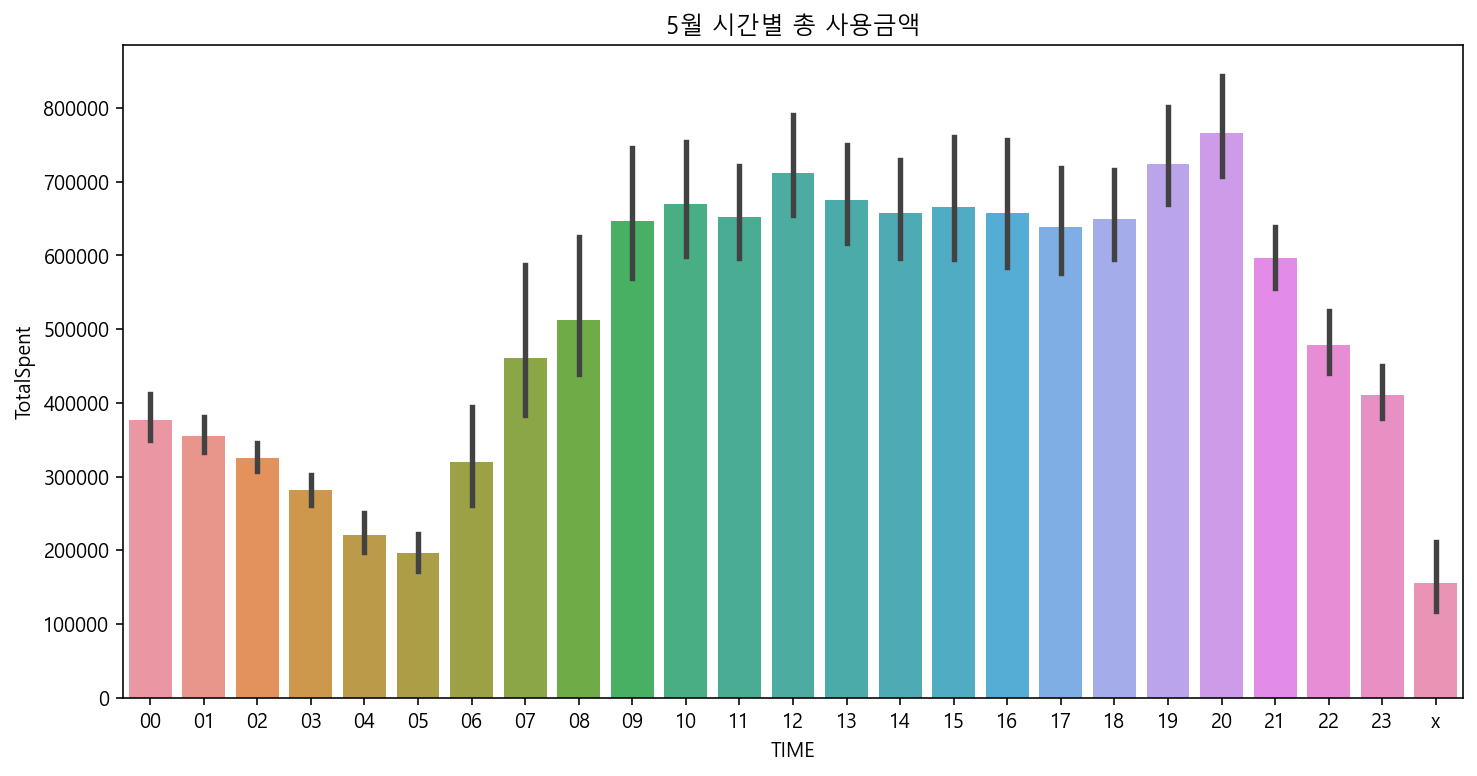

In [539]:
# 5월
plt.figure(figsize=(12,6))
sns.barplot(x='TIME',y='TotalSpent',data=df_5).set_title('5월 시간별 총 사용금액')
plt.show()

In [540]:
# 6월
Time_TS_6 = df_6.groupby('TIME')['TotalSpent'].sum()
Time_TS_6.head(5)

TIME
00    1829673769
01    1261853309
02     888192885
03     526804531
04     321723006
Name: TotalSpent, dtype: int64

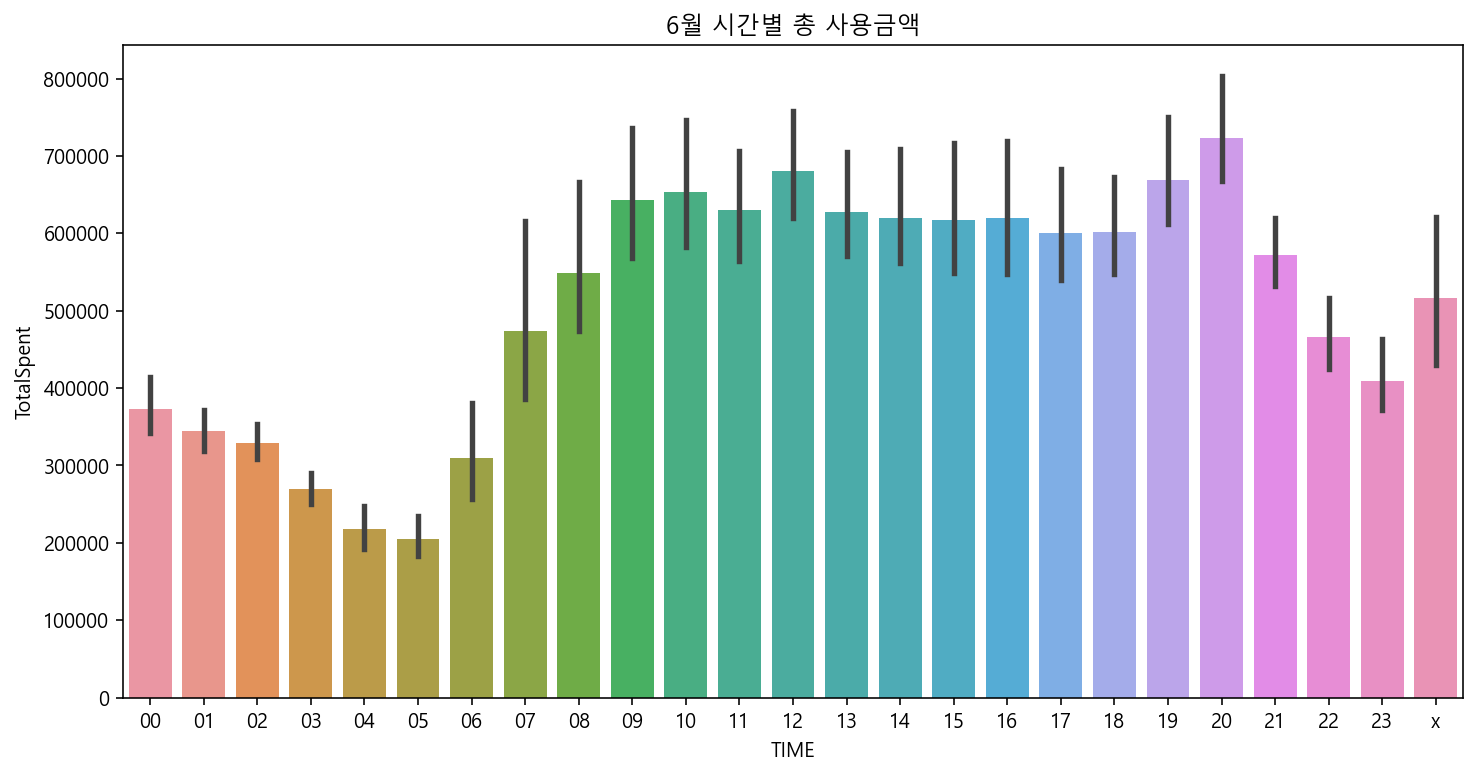

In [541]:
# 6월
plt.figure(figsize=(12,6))
sns.barplot(x='TIME',y='TotalSpent',data=df_6).set_title('6월 시간별 총 사용금액')
plt.show()

In [542]:
# 5월
Time_DS_5 = df_5.groupby('TIME')['DisSpent'].sum()
Time_DS_5.head(5)

TIME
00    131509990
01     80721315
02     52487026
03     36427543
04     22687773
Name: DisSpent, dtype: int64

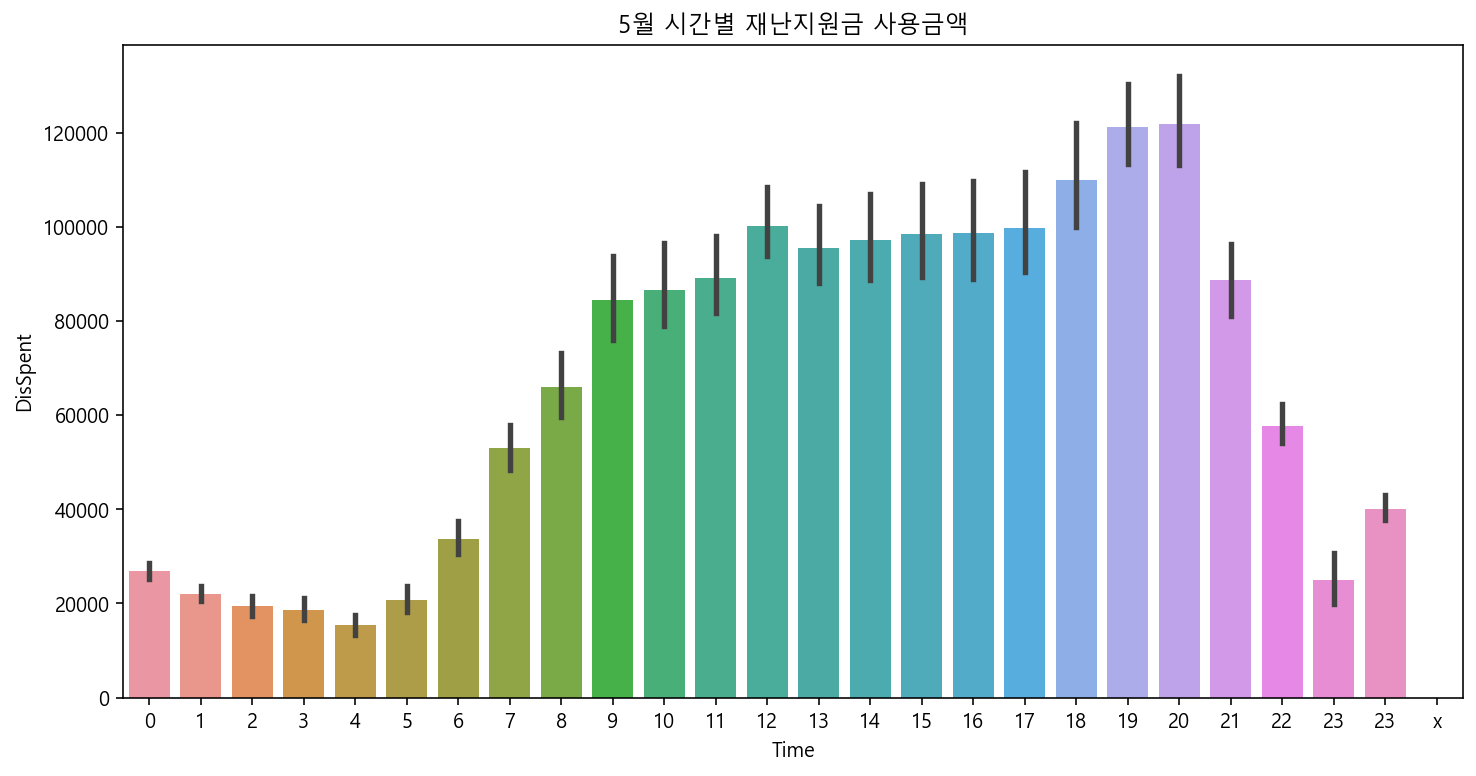

In [419]:
# 5월
plt.figure(figsize=(12,6))
sns.barplot(x='Time',y='DisSpent',data=df_5).set_title('5월 시간별 재난지원금 사용금액')
plt.show()

In [543]:
# 6월
Time_DS_6 = df_6.groupby('TIME')['DisSpent'].sum()
Time_DS_6.head(5)

TIME
00    46811249
01    28936411
02    17488198
03    10092177
04     7857972
Name: DisSpent, dtype: int64

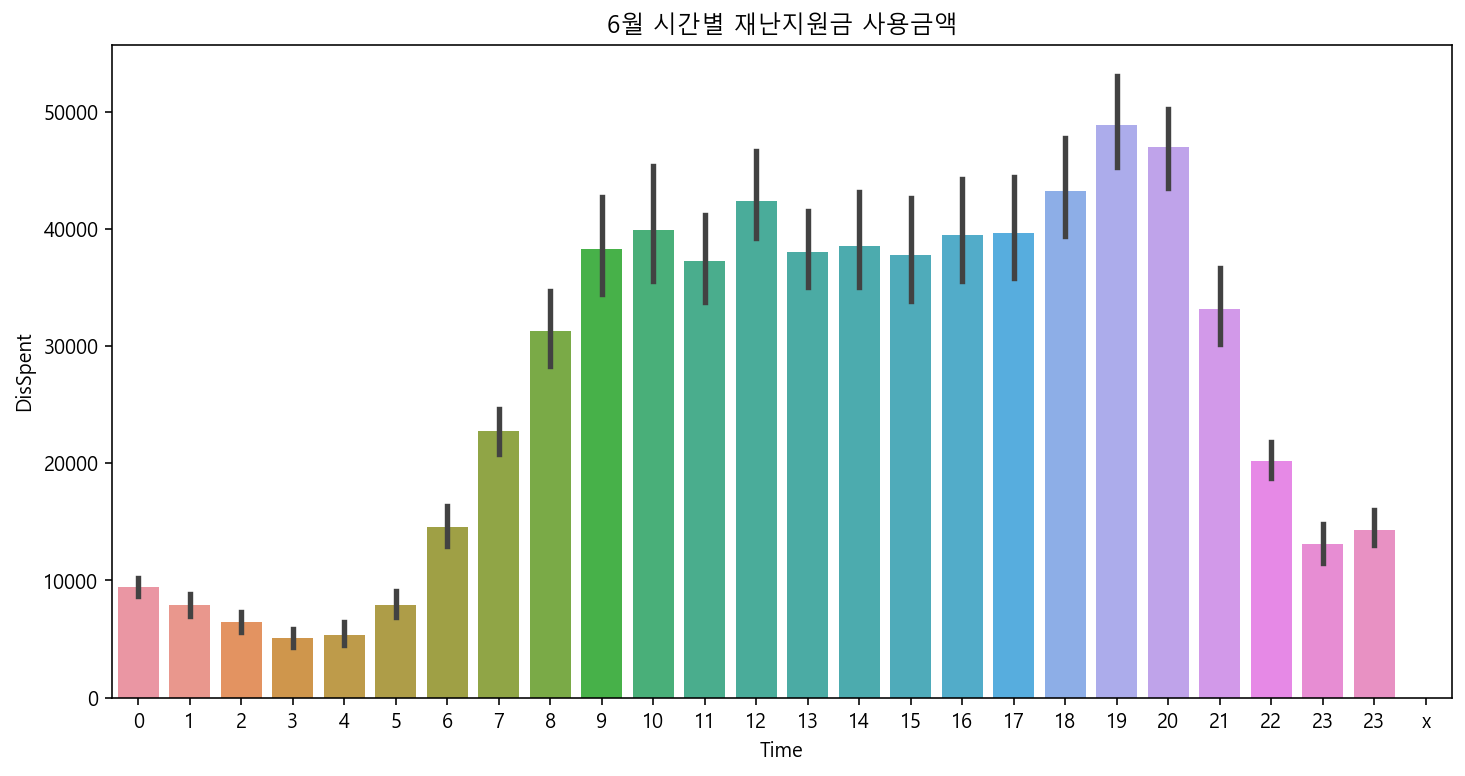

In [545]:
# 6월
plt.figure(figsize=(12,6))
sns.barplot(x='Time',y='DisSpent',data=df_6).set_title('6월 시간별 재난지원금 사용금액')
plt.show()

In [546]:
# 5월
Time_DS_5/Time_TS_5*100

TIME
00     7.125316
01     6.212355
02     5.971849
03     6.627758
04     6.950882
05    10.578502
06    10.578161
07    11.476256
08    12.871973
09    13.065135
10    12.932184
11    13.666408
12    14.088112
13    14.167254
14    14.782712
15    14.809830
16    15.000284
17    15.639762
18    16.955943
19    16.754583
20    15.928441
21    14.894488
22    12.098459
23     9.607268
x      0.000000
dtype: float64

In [550]:
# 5월
TIME_DS_TS_5 = pd.DataFrame(Time_DS_5/Time_TS_5*100,columns=["TIME"])
TIME_DS_TS_5

,TIME
TIME,
00,7.125316
01,6.212355
02,5.971849
03,6.627758
04,6.950882
05,10.578502
06,10.578161
07,11.476256
08,12.871973


In [548]:
# 6월
Time_DS_6/Time_TS_6*100

TIME
00    2.558448
01    2.293168
02    1.968964
03    1.915735
04    2.442465
05    3.503104
06    4.518497
07    4.639270
08    5.619768
09    5.965575
10    6.125062
11    5.892720
12    6.174676
13    6.019056
14    6.188302
15    6.177780
16    6.299600
17    6.630908
18    7.240718
19    7.204598
20    6.348339
21    5.597963
22    4.269080
23    2.856580
x     0.000000
dtype: float64

In [549]:
# 5월
TIME_DS_TS_6 = pd.DataFrame(Time_DS_6/Time_TS_6*100,columns=["TIME"])
TIME_DS_TS_6

,TIME
TIME,
00,2.558448
01,2.293168
02,1.968964
03,1.915735
04,2.442465
05,3.503104
06,4.518497
07,4.639270
08,5.619768


In [ ]:
# 시간대별 재난지원금

In [551]:
#5월
TZ_TS_5 = df_5.groupby('time_zone')['TotalSpent'].sum()
TZ_TS_5

time_zone
새벽     2085104428
심야    10770494113
오전    22706853473
오후    38973712916
저녁    42762457961
점심    51389089308
Name: TotalSpent, dtype: int64

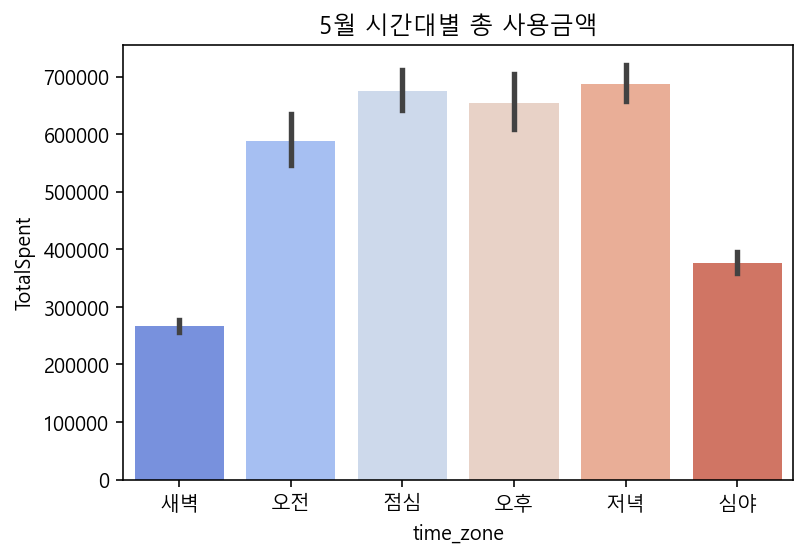

In [417]:
# 5월
sns.barplot(x='time_zone',y='TotalSpent',data=df_5,order=['새벽','오전','점심','오후','저녁','심야'],palette='coolwarm').set_title('5월 시간대별 총 사용금액')
plt.show()

In [552]:
#6월
TZ_TS_6 = df_6.groupby('time_zone')['TotalSpent'].sum()
TZ_TS_6

time_zone
새벽     2085879987
심야    13021944101
오전    22714279495
오후    36047573188
저녁    40191170075
점심    48340691139
Name: TotalSpent, dtype: int64

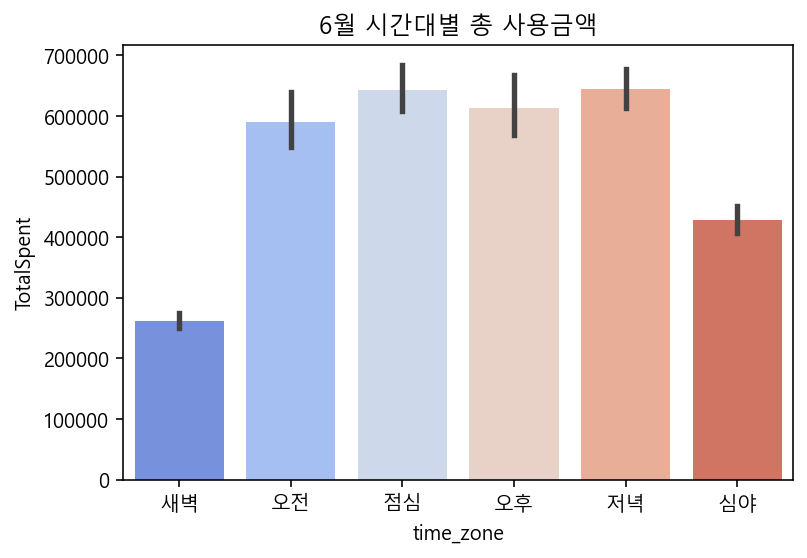

In [554]:
# 6월
sns.barplot(x='time_zone',y='TotalSpent',data=df_6,order=['새벽','오전','점심','오후','저녁','심야'],palette='coolwarm').set_title('6월 시간대별 총 사용금액')
plt.show()

In [555]:
# 5월
TZ_DS_5 = df_5.groupby('time_zone')['DisSpent'].sum()
TZ_DS_5

time_zone
새벽     146529886
심야     977973938
오전    2894522979
오후    5902503821
저녁    6964971428
점심    7293592572
Name: DisSpent, dtype: int64

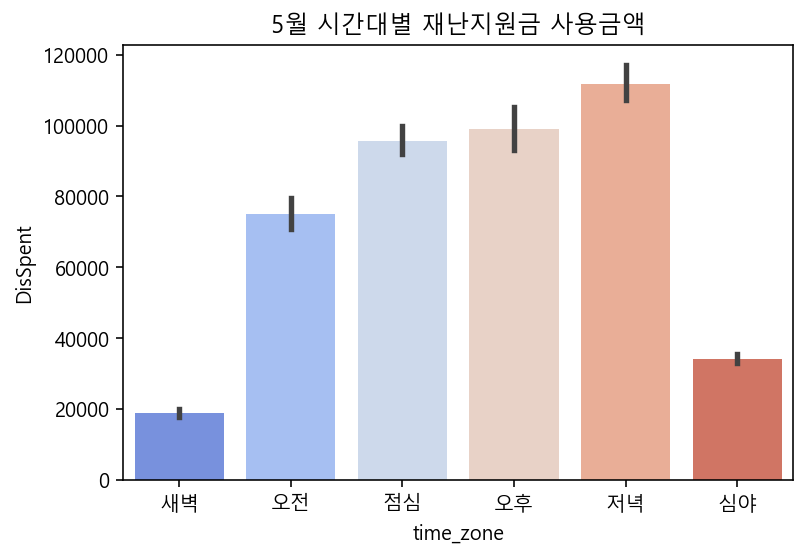

In [557]:
# 5월
sns.barplot(x='time_zone',y='DisSpent',data=df_5,order=['새벽','오전','점심','오후','저녁','심야'],palette='coolwarm').set_title('5월 시간대별 재난지원금 사용금액')
plt.show()

In [558]:
# 6월
TZ_DS_6 = df_6.groupby('time_zone')['DisSpent'].sum()
TZ_DS_6

time_zone
새벽      49504868
심야     350762544
오전    1317363162
오후    2287394244
저녁    2725799222
점심    2935524984
Name: DisSpent, dtype: int64

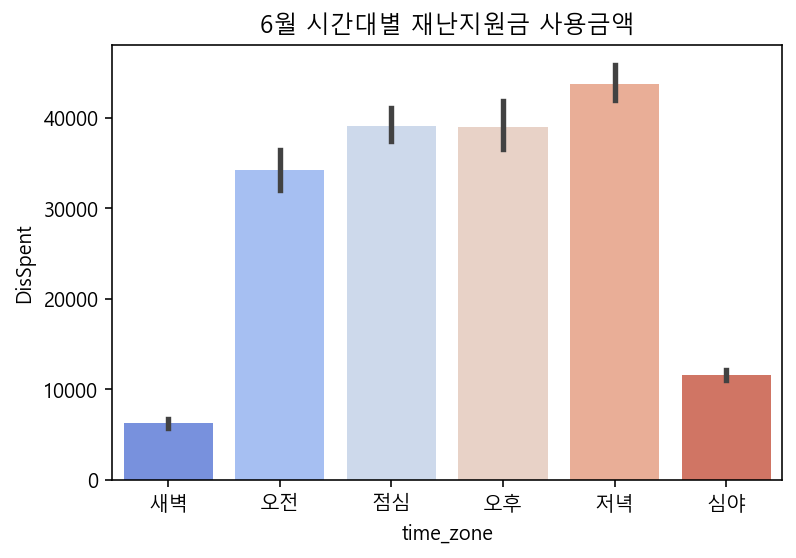

In [560]:
# 6월
sns.barplot(x='time_zone',y='DisSpent',data=df_6,order=['새벽','오전','점심','오후','저녁','심야'],palette='coolwarm').set_title('6월 시간대별 재난지원금 사용금액')
plt.show()

In [561]:
 # 5월
TZ_DS_5/TZ_TS_5*100

time_zone
새벽     7.027460
심야     9.080121
오전    12.747354
오후    15.144833
저녁    16.287584
점심    14.192882
dtype: float64

In [562]:
# 5월
TZ_DS_TS_5 = pd.DataFrame(TZ_DS_5/TZ_TS_5*100,columns=["time_zone"])
TZ_DS_TS_5

,time_zone
time_zone,
새벽,7.027460
심야,9.080121
오전,12.747354
오후,15.144833
저녁,16.287584
점심,14.192882


Text(0.5, 1.0, '시간대별 재난지원금 사용 비율-5월(%)')

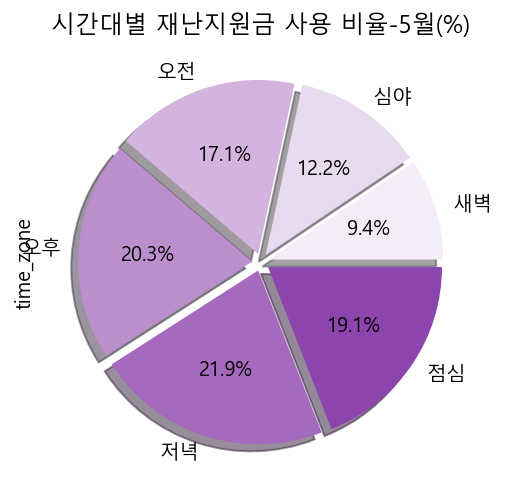

In [563]:
# 5월
TZ_DS_TS_5["time_zone"].plot.pie(autopct = '%1.1f%%',colors=['#F4ECF7','#E8DAEF','#D2B4DE','#BB8FCE','#A569BD','#8E44AD'],explode= [0.05, 0.05,0.05,0.05,0.05,0.05],shadow=True).set_title('시간대별 재난지원금 사용 비율-5월(%)')

In [564]:
 # 6월
TZ_DS_6/TZ_TS_6*100

time_zone
새벽    2.373333
심야    2.693627
오전    5.799714
오후    6.345487
저녁    6.782085
점심    6.072576
dtype: float64

In [565]:
# 6월
TZ_DS_TS_6 = pd.DataFrame(TZ_DS_6/TZ_TS_6*100,columns=["time_zone"])
TZ_DS_TS_6

,time_zone
time_zone,
새벽,2.373333
심야,2.693627
오전,5.799714
오후,6.345487
저녁,6.782085
점심,6.072576


Text(0.5, 1.0, '시간대별 재난지원금 사용 비율-6월(%)')

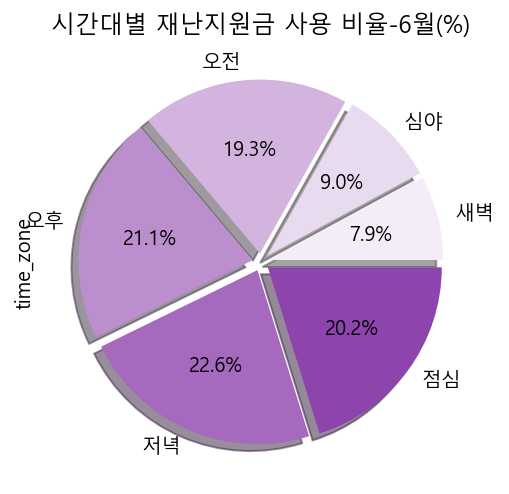

In [634]:
# 6월
TZ_DS_TS_6["time_zone"].plot.pie(autopct = '%1.1f%%',colors=['#F4ECF7','#E8DAEF','#D2B4DE','#BB8FCE','#A569BD','#8E44AD'],explode= [0.05, 0.05,0.05,0.05,0.05,0.05],shadow=True).set_title('시간대별 재난지원금 사용 비율-6월(%)')

In [ ]:
# 5월 상위 5 업종

In [567]:
# 5월
c_ts_5 = df_5[["classification","TotalSpent"]]
c_ts_5

,classification,TotalSpent
0,외식,363000
1,유흥/주점,1180000
2,식료품,157670
3,식료품,46600
4,유흥/주점,66000
...,...,...
273178,건축/기타,17000
273179,외식,12000
273180,식료품,4800
273181,식료품,25000


In [568]:
# 5월 상위 10 업종(전채)
c_ts_5 = c_ts_5.groupby('classification').sum()
c_ts_5 = c_ts_5.sort_values(by='TotalSpent',ascending=False)
c_ts_5.head(5)

,TotalSpent
classification,
식료품,40312821333
외식,38129157738
쇼핑,17303051888
교통/자동차,12971096195
의료,11133494810


<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

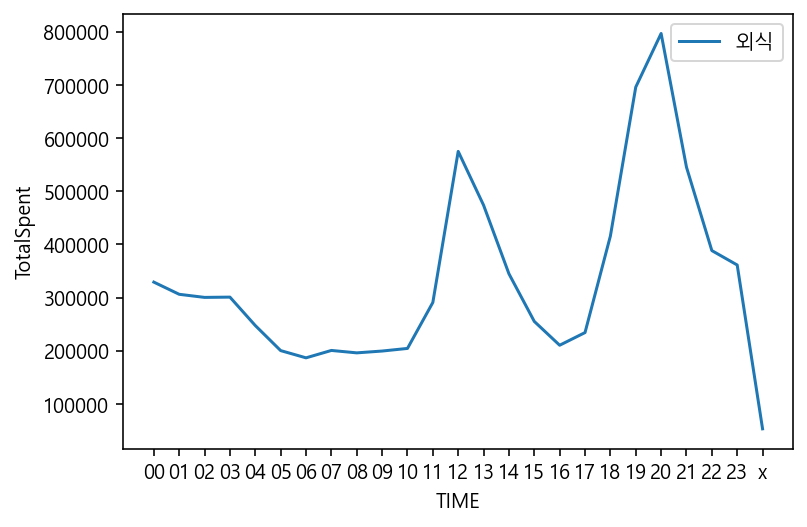

In [569]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="외식"], x='TIME',y='TotalSpent',ci=None, label='외식')


<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

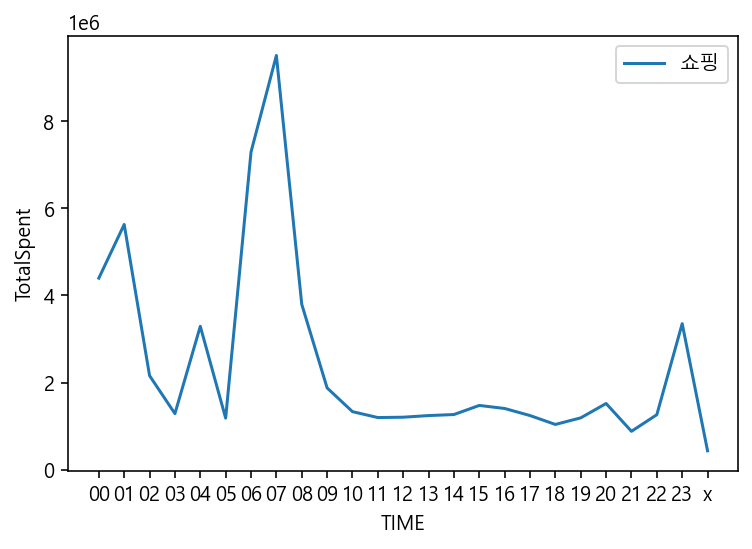

In [570]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="쇼핑"], x='TIME',y='TotalSpent',ci=None, label='쇼핑')


<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

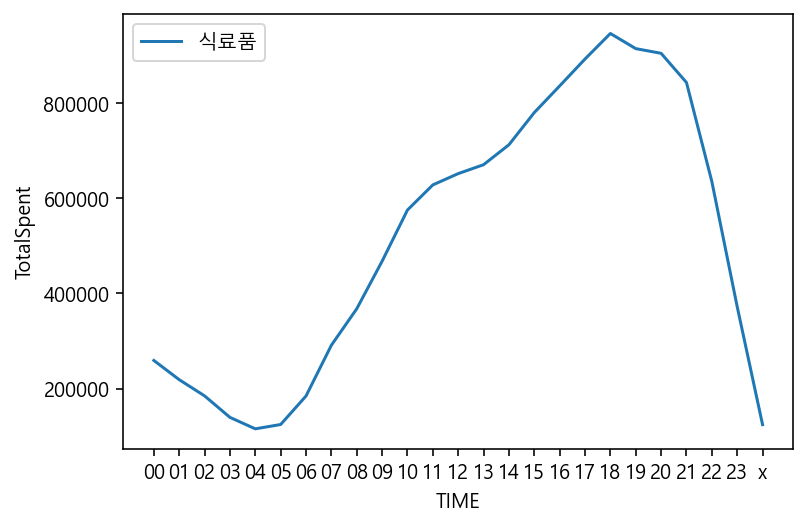

In [571]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="식료품"], x='TIME',y='TotalSpent',ci=None, label='식료품')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

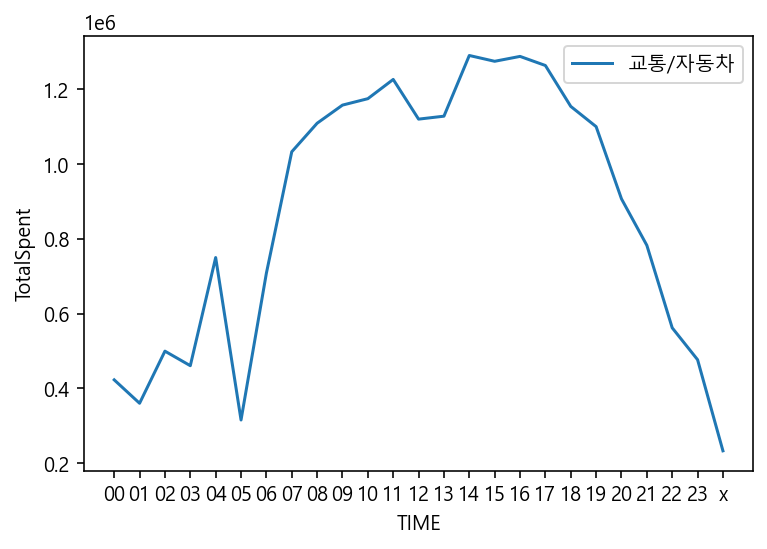

In [572]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="교통/자동차"], x='TIME',y='TotalSpent',ci=None, label='교통/자동차')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

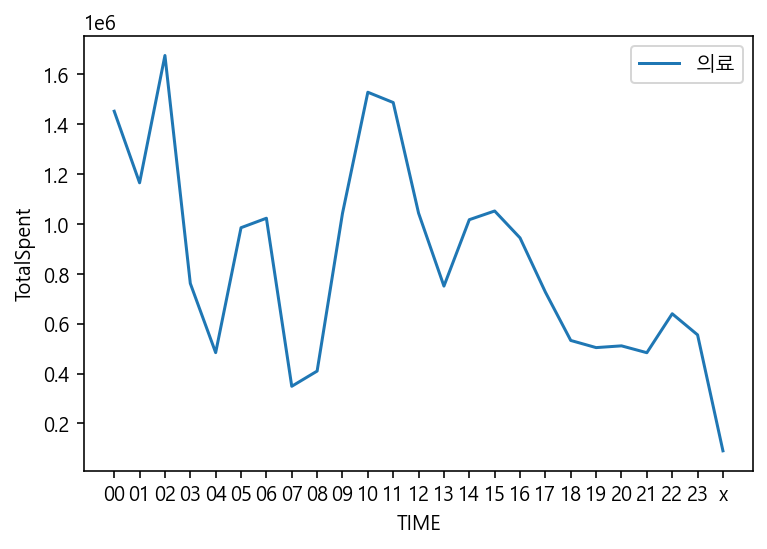

In [573]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="의료"], x='TIME',y='TotalSpent',ci=None, label='의료')

In [ ]:
# 6월 상위 5업종(전채)

In [574]:
# 6월
c_ts_6 = df_6[["classification","TotalSpent"]]
c_ts_6

,classification,TotalSpent
0,외식,502000
1,유흥/주점,1520000
2,식료품,482310
3,식료품,38050
4,외식,32000
...,...,...
273178,레저/스포츠,664500
273179,외식,32000
273180,식료품,11000
273181,건축/기타,34500


In [575]:
# 6월 상위 10 업종(전채)
c_ts_6 = c_ts_6.groupby('classification').sum()
c_ts_6 = c_ts_6.sort_values(by='TotalSpent',ascending=False)
c_ts_6.head(5)

,TotalSpent
classification,
식료품,37639948020
외식,36742320924
쇼핑,17481658424
교통/자동차,12541493425
의료,11460317592


<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

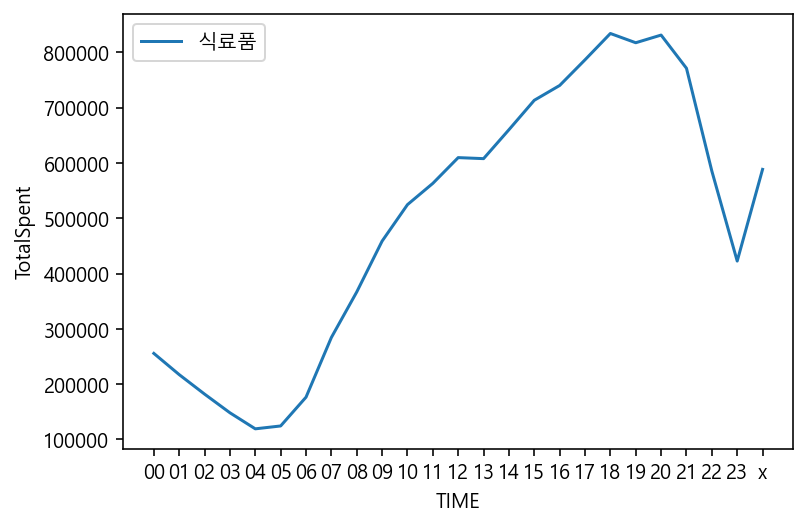

In [576]:
# 6월
sns.lineplot(data=df_6[df_6['classification']=="식료품"], x='TIME',y='TotalSpent',ci=None, label='식료품')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

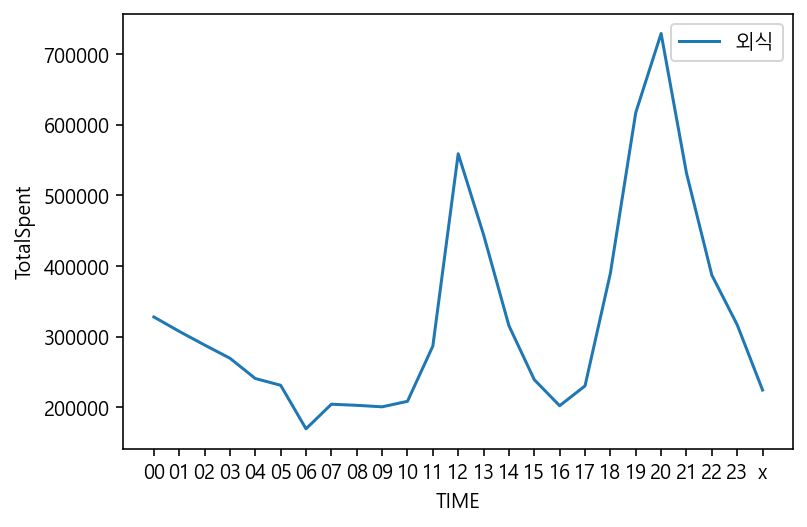

In [577]:
# 6월
sns.lineplot(data=df_6[df_6['classification']=="외식"], x='TIME',y='TotalSpent',ci=None, label='외식')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

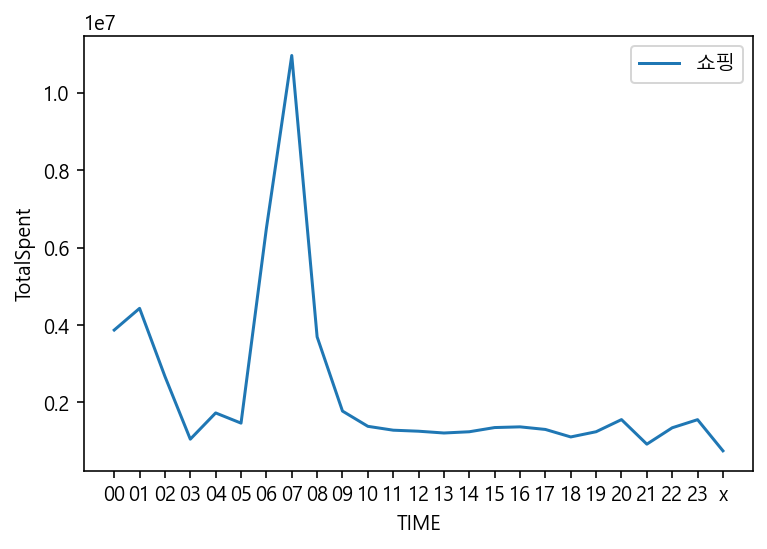

In [578]:
# 6월
sns.lineplot(data=df_6[df_6['classification']=="쇼핑"], x='TIME',y='TotalSpent',ci=None, label='쇼핑')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

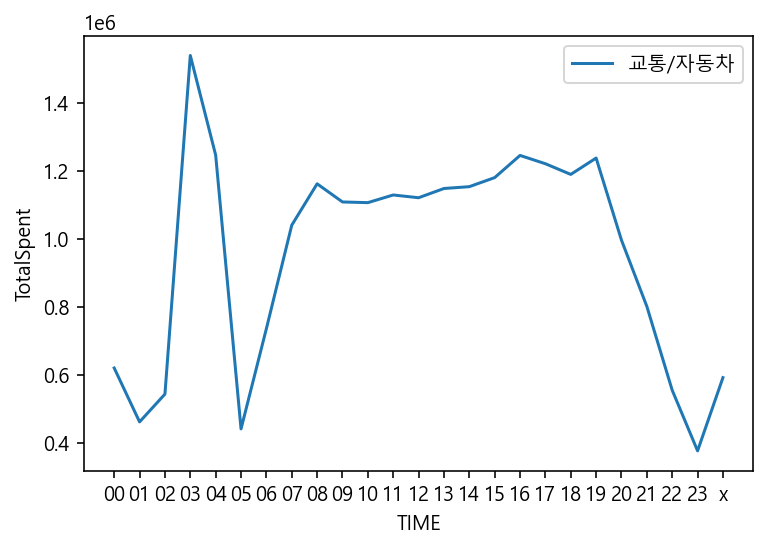

In [579]:
# 6월
sns.lineplot(data=df_6[df_6['classification']=="교통/자동차"], x='TIME',y='TotalSpent',ci=None, label='교통/자동차')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

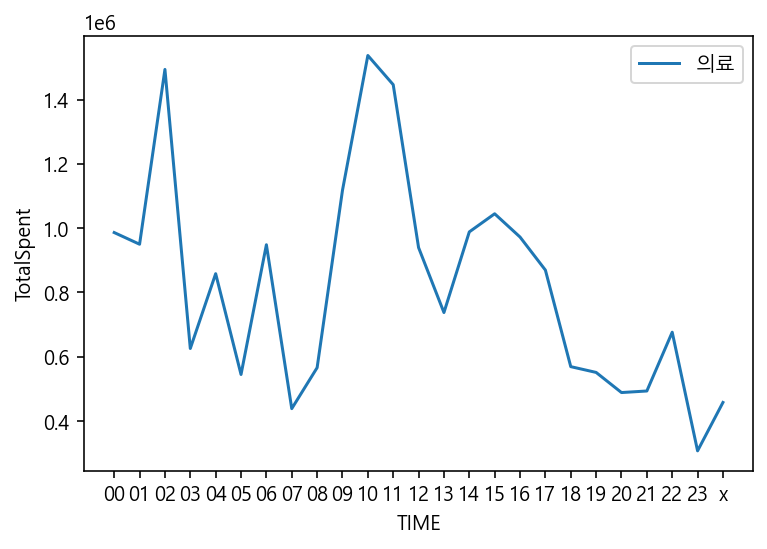

In [580]:
# 6월
sns.lineplot(data=df_6[df_6['classification']=="의료"], x='TIME',y='TotalSpent',ci=None, label='의료')

In [589]:
# 5월
c_ds_5 = df_5[["classification",'DisSpent']]
c_ds_5

,classification,DisSpent
0,외식,66500
1,유흥/주점,0
2,식료품,6850
3,식료품,0
4,유흥/주점,0
...,...,...
273178,건축/기타,0
273179,외식,0
273180,식료품,0
273181,식료품,0


In [590]:
# 5월 상위 10 업종(재난지원금)
c_ds_5 = c_ds_5.groupby('classification').sum()
c_ds_5 = c_ds_5.sort_values(by='DisSpent',ascending=False)
c_ds_5.head(5)

,DisSpent
classification,
식료품,7741962050
외식,5391056740
교통/자동차,2013829169
농업,1777111828
의료,1675572420


<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

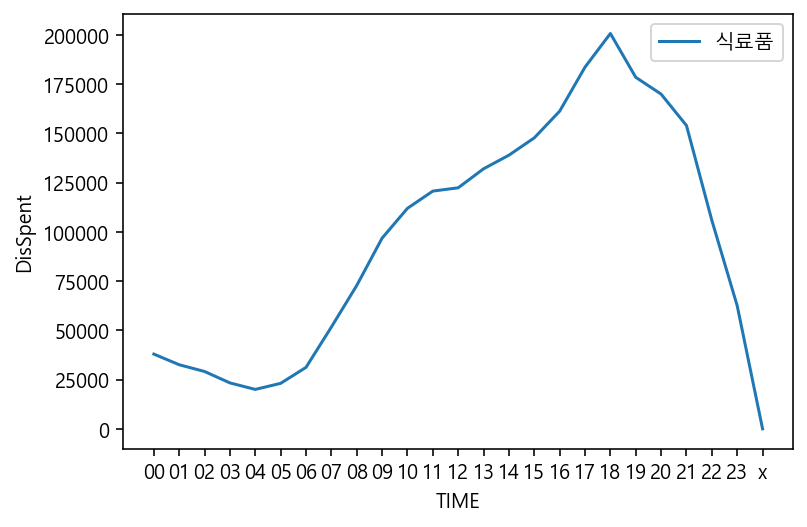

In [593]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="식료품"], x='TIME',y='DisSpent',ci=None, label='식료품')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

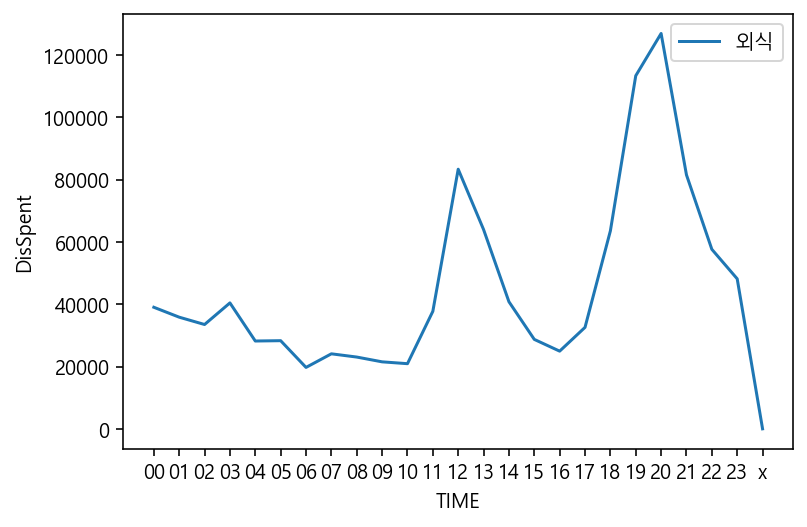

In [594]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="외식"], x='TIME',y='DisSpent',ci=None, label='외식')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

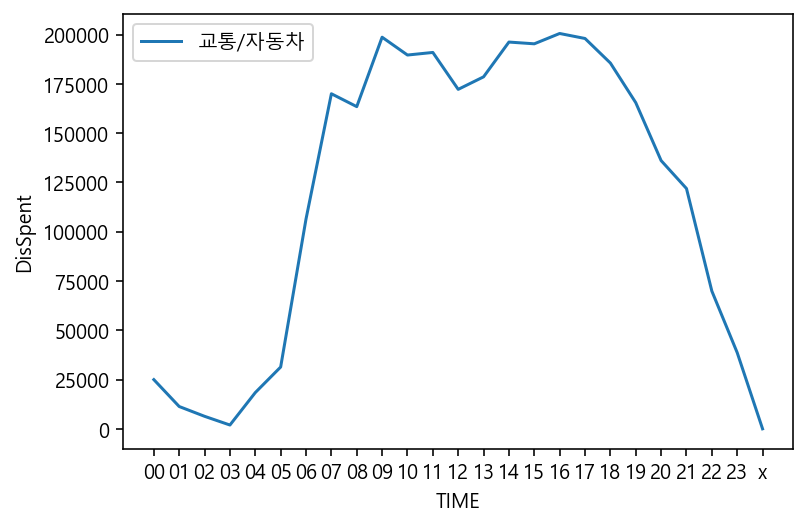

In [321]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="교통/자동차"], x='TIME',y='DisSpent',ci=None, label='교통/자동차')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

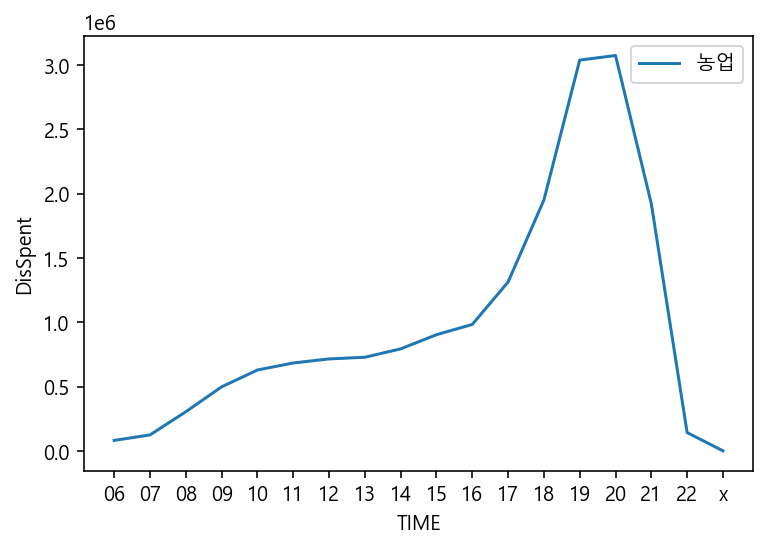

In [322]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="농업"], x='TIME',y='DisSpent',ci=None, label='농업')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

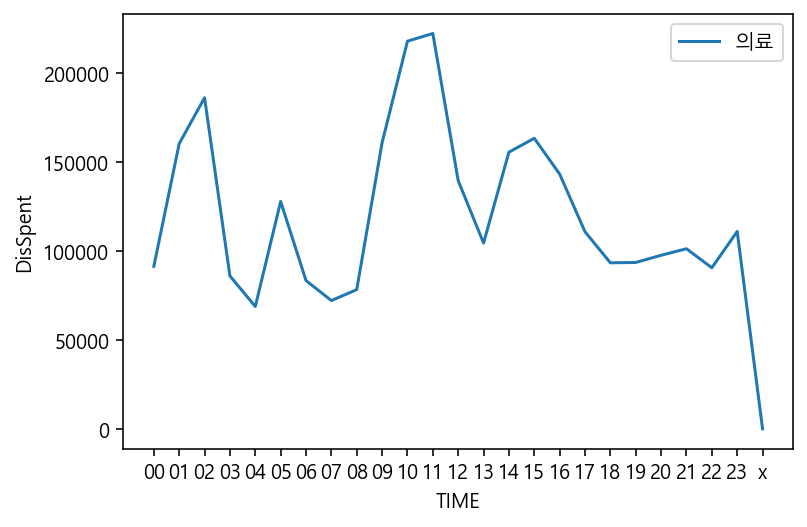

In [323]:
# 5월
sns.lineplot(data=df_5[df_5['classification']=="의료"], x='TIME',y='DisSpent',ci=None, label='의료')

In [592]:
# 6월
c_ds_6 = df_6[["classification",'DisSpent']]
c_ds_6

,classification,DisSpent
0,외식,0
1,유흥/주점,0
2,식료품,0
3,식료품,5450
4,외식,32000
...,...,...
273178,레저/스포츠,0
273179,외식,0
273180,식료품,0
273181,건축/기타,0


In [597]:
# 6월 상위 10 업종(재난지원금)
c_ds_6 = c_ds_6.groupby('classification').sum()
c_ds_6 = c_ds_6.sort_values(by='DisSpent',ascending=False)
c_ds_6.head(5)

,DisSpent
classification,
식료품,3216654488
외식,2099453226
의료,888560276
농업,864250956
교통/자동차,813530120


<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

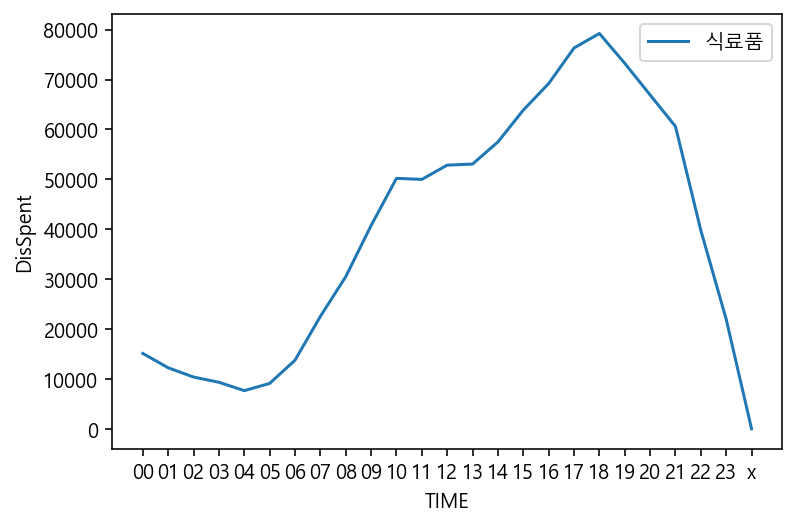

In [598]:
sns.lineplot(data=df_6[df_6['classification']=="식료품"], x='TIME',y='DisSpent',ci=None, label='식료품')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

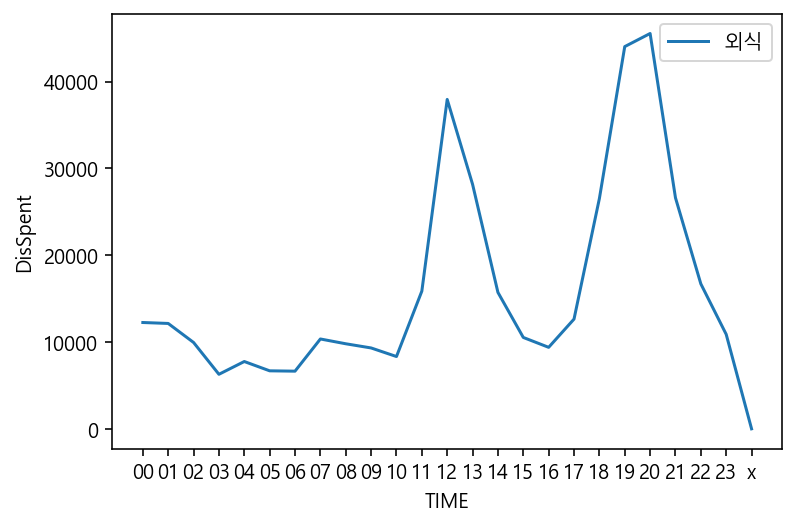

In [599]:
sns.lineplot(data=df_6[df_6['classification']=="외식"], x='TIME',y='DisSpent',ci=None, label='외식')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

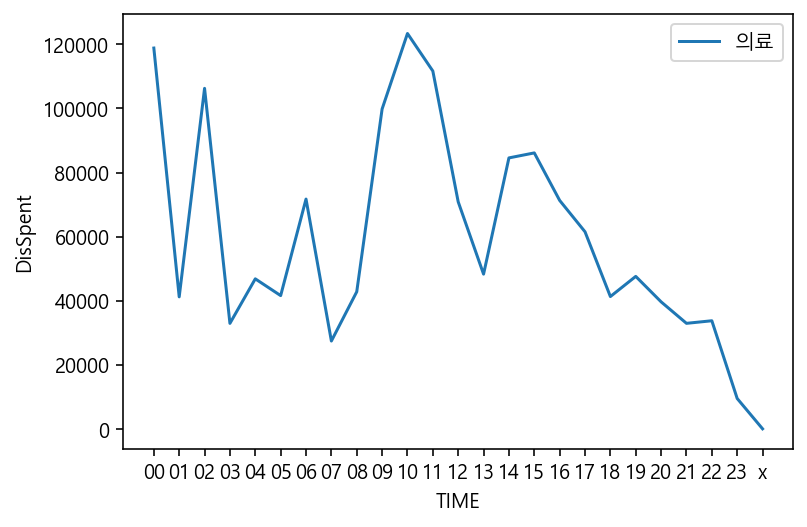

In [600]:
sns.lineplot(data=df_6[df_6['classification']=="의료"], x='TIME',y='DisSpent',ci=None, label='의료')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

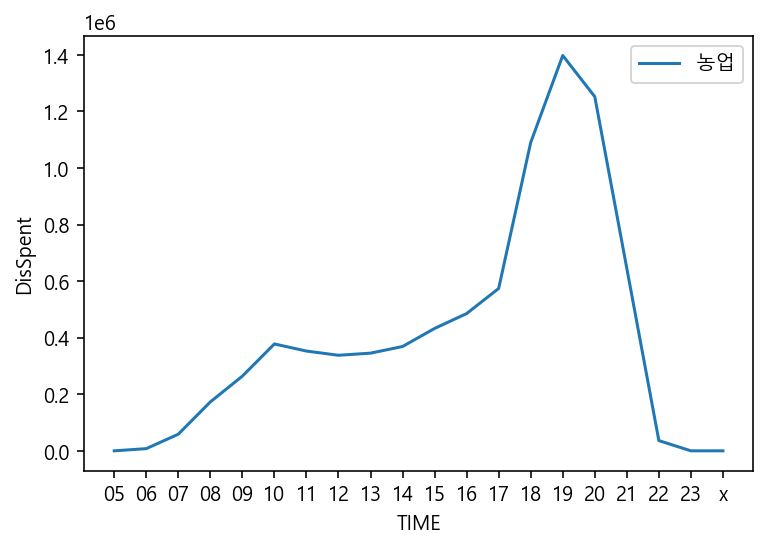

In [601]:
sns.lineplot(data=df_6[df_6['classification']=="농업"], x='TIME',y='DisSpent',ci=None, label='농업')

<AxesSubplot:xlabel='TIME', ylabel='DisSpent'>

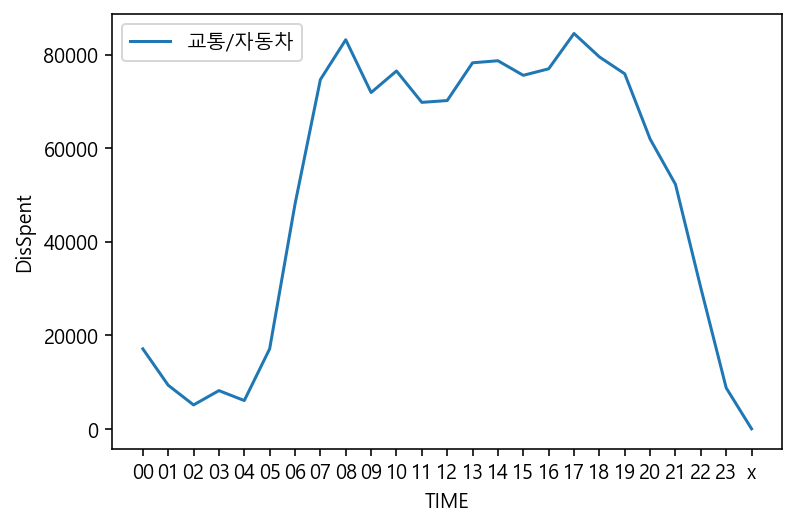

In [602]:
sns.lineplot(data=df_6[df_6['classification']=="교통/자동차"], x='TIME',y='DisSpent',ci=None, label='교통/자동차')

<AxesSubplot:xlabel='TIME', ylabel='TotalSpent'>

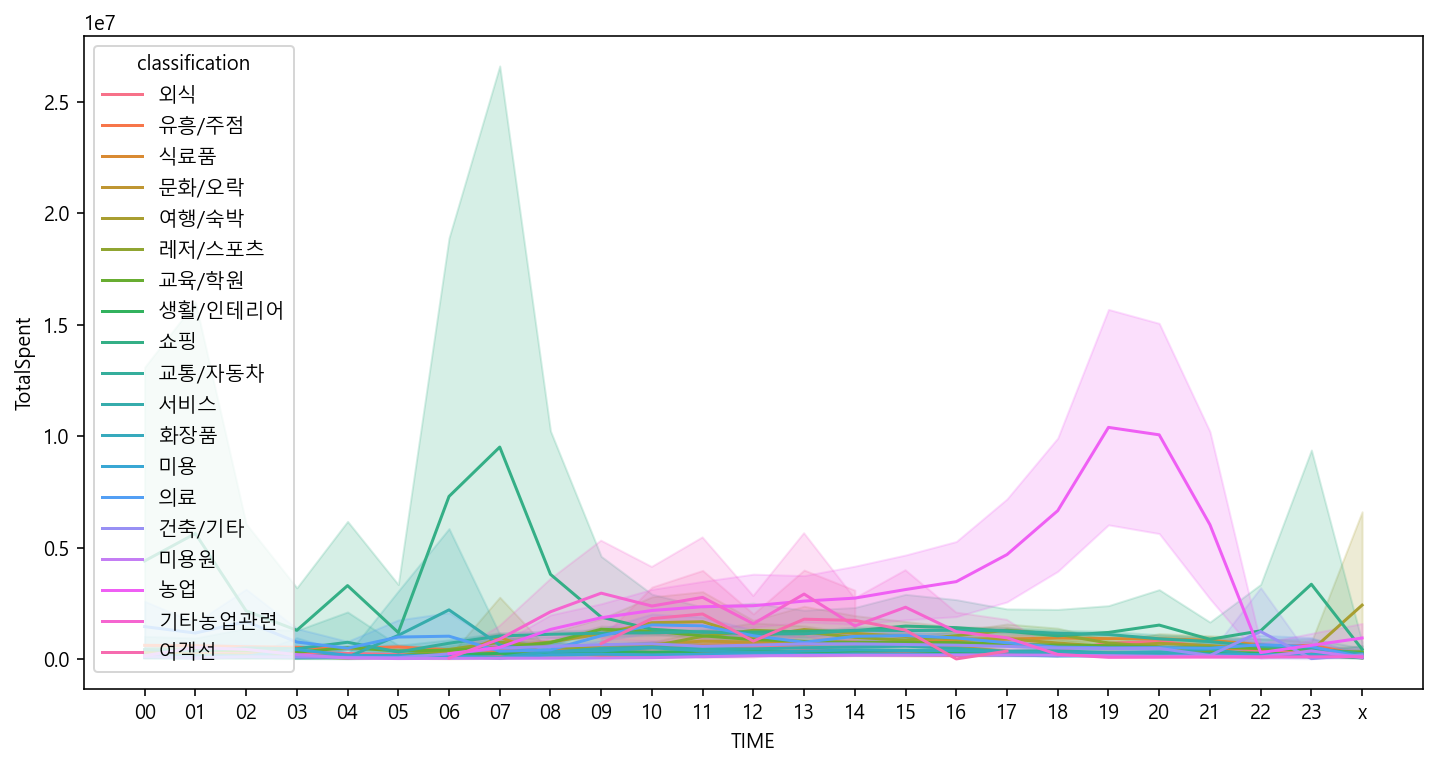

In [282]:
plt.figure(figsize=(12,6))
sns.lineplot( x="TIME", y="TotalSpent", hue = 'classification',data=df_5)


Text(0.5, 1.0, '시간 별 총 사용 금액(외식) - 5월')

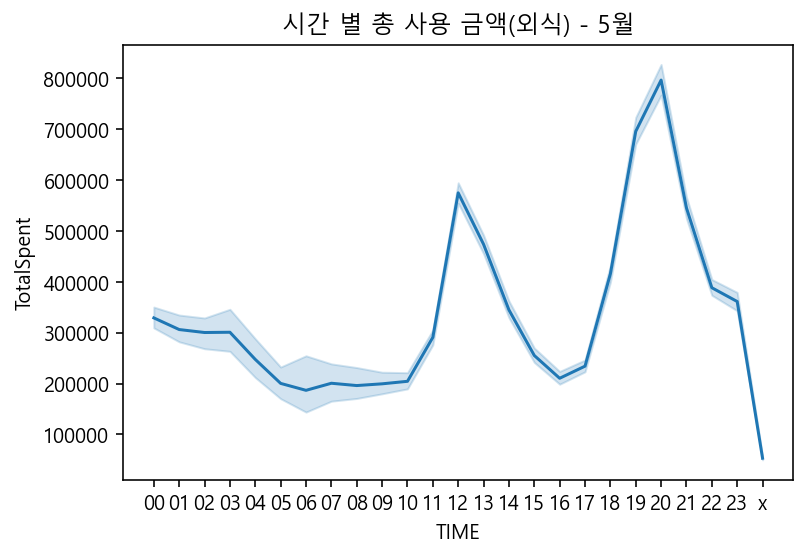

In [369]:
sns.lineplot(data=df_5.query("classification in '외식'"),x="TIME",y="TotalSpent").set_title('시간 별 총 사용 금액(외식) - 5월')

In [8]:
df_6.head(2)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification
0,0,1,1,202006,제주특별자치도,제주시,영세,일반한식,0,502000,0,10,0,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식
1,1,2,2,202006,제주특별자치도,제주시,영세,단란주점,0,1520000,0,8,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점
